<a href="https://colab.research.google.com/github/TaraRasti/Data-Mining-with-R/blob/main/regression_KNN_DTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = "../input/dataset/Iran_Maskan_koll9904.xlsx"
library(tidyverse)
library(readxl)
library(reshape2)
library(dplyr)
library(scales)
df = read_excel(path)

In [ ]:
df

کد قرارداد نوع قرارداد استان        شهرستان       نوع ملک        
1     19048875   مبایعه نامه فارس         شيراز         دستگاه آپارتمان
2     19048878   مبایعه نامه تهران        پاكدشت        دستگاه آپارتمان
3     19048887   مبایعه نامه البرز        کرج           دستگاه آپارتمان
4     19048894   مبایعه نامه گیلان        آستانه اشرفيه دستگاه آپارتمان
5     19048896   مبایعه نامه فارس         شيراز         دستگاه آپارتمان
6     19048910   مبایعه نامه فارس         شيراز         دستگاه آپارتمان
7     19048913   مبایعه نامه تهران        تهران         دستگاه آپارتمان
8     19048924   مبایعه نامه تهران        تهران         دستگاه آپارتمان
9     19048925   مبایعه نامه فارس         شيراز         دستگاه آپارتمان
10    19048931   مبایعه نامه تهران        انديشه        دستگاه آپارتمان
11    19048953   مبایعه نامه تهران        تهران         دستگاه آپارتمان
12    19048969   مبایعه نامه البرز        کرج           دستگاه آپارتمان
13    19048971   مبایعه نامه خوزستان      اهواز         دستگاه آپارتمان
14    19048972   مبایعه نامه البرز        کرج           دستگاه آپارتمان
15    19048973   مبایعه نامه تهران        ملارد         دستگاه آپارتمان
16    19048980   مبایعه نامه البرز        کرج           دستگاه آپارتمان
17    19048984   مبایعه نامه البرز        نظر آباد      دستگاه آپارتمان
18    19048995   مبایعه نامه تهران        تهران         دستگاه آپارتمان
19    19048999   مبایعه نامه البرز        کرج           دستگاه آپارتمان
20    19049001   مبایعه نامه مازندران     قائم شهر      دستگاه آپارتمان
21    19049002   مبایعه نامه مازندران     ساري          دستگاه آپارتمان
22    19049037   مبایعه نامه تهران        اسلامشهر      دستگاه آپارتمان
23    19049041   مبایعه نامه البرز        کرج           دستگاه آپارتمان
24    19049043   مبایعه نامه خراسان شمالی آشخانه        دستگاه آپارتمان
25    19049046   مبایعه نامه تهران        تهران         دستگاه آپارتمان
26    19049048   مبایعه نامه البرز        کرج           دستگاه آپارتمان
27    19049015   مبایعه نامه البرز        نظر آباد      دستگاه آپارتمان
28    19049078   مبایعه نامه البرز        کرج           دستگاه آپارتمان
29    19049104   مبایعه نامه البرز        کرج           دستگاه آپارتمان
30    19049111   مبایعه نامه البرز        کرج           دستگاه آپارتمان
⋮     ⋮          ⋮           ⋮            ⋮             ⋮              
43104 NA         NA          NA           NA            NA             
43105 NA         NA          NA           NA            NA             
43106 NA         NA          NA           NA            NA             
43107 NA         NA          NA           NA            NA             
43108 NA         NA          NA           NA            NA             
43109 NA         NA          NA           NA            NA             
43110 NA         NA          NA           NA            NA             
43111 NA         NA          NA           NA            NA             
43112 NA         NA          NA           NA            NA             
43113 NA         NA          NA           NA            NA             
43114 NA         NA          NA           NA            NA             
43115 NA         NA          NA           NA            NA             
43116 NA         NA          NA           NA            NA             
43117 NA         NA          NA           NA            NA             
43118 NA         NA          NA           NA            NA             
43119 NA         NA          NA           NA            NA             
43120 NA         NA          NA           NA            NA             
43121 NA         NA          NA           NA            NA             
43122 NA         NA          NA           NA            NA             
43123 NA         NA          NA           NA            NA             
43124 NA         NA          NA           NA            NA             
43125 NA         NA          NA           NA            NA             
43126 NA         NA          NA           NA            NA             
43127 NA         NA          NA           NA  

In [ ]:
attach(df)
df = as.data.frame(df)
names(df)[1]  <- "contract_id"
names(df)[2]  <- "contract_type"
names(df)[3]  <- "province"
names(df)[4]  <- "city"
names(df)[5]  <- "estate_type"
names(df)[6]  <- "region"
names(df)[7]  <- "account_type"
names(df)[8]  <- "area"
names(df)[9]  <- "percentage"
names(df)[10] <- "price"
names(df)[11] <- "unit_price"
names(df)[12] <- "age"
names(df)[13] <- "frame_type"
names(df)[14] <- "contract_date"
names(df)[15] <- "postal_code"
colnames(df)
provinces = as.matrix(unique(df["province"]))

data = subset.data.frame(df, province==provinces[21]|province==provinces[12])

print(data)
dim(data)
summary(data)
attach(data)

The following objects are masked from df (pos = 25):

    استان, تاریخ ثبت قرارداد, درصد, شش رقم نخست کد پستی, شهرستان, عمر
    بنا, قیمت, قیمت یک مترمربع, کد قرارداد, مساحت, منطقه شهرداری, نوع
    اسکلت, نوع قرارداد, نوع کاربری, نوع ملک




[1] "contract_id"   "contract_type" "province"      "city"         
 [5] "estate_type"   "region"        "account_type"  "area"         
 [9] "percentage"    "price"         "unit_price"    "age"          
[13] "frame_type"    "contract_date" "postal_code"

      contract_id contract_type province           city     estate_type region
55       19049274   مبایعه نامه كرمانشاه       كرمانشاه دستگاه آپارتمان      5
85       19049486   مبایعه نامه كرمانشاه       كرمانشاه دستگاه آپارتمان      3
108      19049615   مبایعه نامه كرمانشاه       كرمانشاه دستگاه آپارتمان     NA
135      19049749   مبایعه نامه كرمانشاه       كرمانشاه دستگاه آپارتمان      5
190      19050040   مبایعه نامه كرمانشاه      قصر شيرين دستگاه آپارتمان      1
202      19050106   مبایعه نامه كرمانشاه       كرمانشاه دستگاه آپارتمان      5
246      19050352   مبایعه نامه كرمانشاه       كرمانشاه دستگاه آپارتمان     NA
254      19050405   مبایعه نامه كرمانشاه       كرمانشاه دستگاه آپارتمان     NA
287      19050533   مبایعه نامه كرمانشاه       كرمانشاه دستگاه آپارتمان      6
315      19050675   مبایعه نامه كرمانشاه         دالاهو دستگاه آپارتمان     NA
342      19050820   مبایعه نامه كرمانشاه       كرمانشاه دستگاه آپارتمان      4
382      19051018   مبایعه نامه كرمانشاه       كرمان

[1] 1258   15

 contract_id        contract_type        province             city          
 Length:1258        Length:1258        Length:1258        Length:1258       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 estate_type            region    account_type            area      
 Length:1258        Min.   : 1    Length:1258        Min.   :    1  
 Class :character   1st Qu.: 2    Class :character   1st Qu.:   75  
 Mode  :character   Median : 5    Mode  :character   Median :   90  
                    Mean   : 4                       Mean   :  149  
                    3rd Qu.: 5         

The following objects are masked _by_ .GlobalEnv:

    city, frame_type


The following objects are masked from data2:

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price


The following objects are masked from data1:

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price


The following objects are masked from data (pos = 25):

    account_type, age, area, city, contract_date, contract_id,
    contract_type, estate_type, frame_type, percentage, postal_code,
    price, province, region, unit_price




In [ ]:
for (i in 1:nrow(data)){
  if (data$frame_type[i]=="بدون اسکلت"){
    
    data$frame_type[i]="No Frame"
    
  }
}

for (i in 1:nrow(data)){
  if (data$frame_type[i]=="آجر یا بلوک سیمانی"){
    
    data$frame_type[i]="brick or concrete block"
    
  }
}

for (i in 1:nrow(data)){
  if (data$frame_type[i]=="فلزی"){
    
    data$frame_type[i]="metal"
    
  }
}

for (i in 1:nrow(data)){
  if (data$frame_type[i]=="بتونی"){
    
    data$frame_type[i]="concrete"
    
  }
}


for (i in 1:nrow(data)){
  if (data$frame_type[i]=="بتونی و فلزی"){
    
    data$frame_type[i]="concrete and metal"
    
  }
}

In [ ]:
unique(data$frame_type)

[1] "concrete"                "concrete and metal"     
[3] "metal"                   "No Frame"               
[5] "brick or concrete block"

In [ ]:
for (i in 1:nrow(data)){
  if (data$city[i]=="بانه"){
    
    data$city[i]="Baaneh"
    
  }
}

for (i in 1:nrow(data)){
  if (data$city[i]=="سقز"){
    
    data$city[i]="Saqez"
    
  }
}

for (i in 1:nrow(data)){
  if (data$city[i]=="دلبران"){
    
    data$city[i]="Delbaran"
    
  }
}

for (i in 1:nrow(data)){
  if (data$city[i]=="بيجار"){
    
    data$city[i]="Bijaar"
    
  }
}


for (i in 1:nrow(data)){
  if (data$city[i]=="قروه"){
    
    data$city[i]="Qorveh"
    
  }
}

for (i in 1:nrow(data)){
  if (data$city[i]=="سنندج"){
    
    data$city[i]="Sanandaj"
    
  }
}

for (i in 1:nrow(data)){
  if (data$city[i]=="ديواندره"){
    
    data$city[i]="Divaan Dareh"
    
  }
}

for (i in 1:nrow(data)){
  if (data$city[i]=="پاوه"){
    
    data$city[i]="Paaveh"
    
  }
}


for (i in 1:nrow(data)){
  if (data$city[i]=="دالاهو"){
    
    data$city[i]="Daalaahoo"
    
  }
}


for (i in 1:nrow(data)){
  if (data$city[i]=="قصر شيرين"){
    
    data$city[i]="Qasr e Shirin"
    
  }
}


for (i in 1:nrow(data)){
  if (data$city[i]=="كرمانشاه"){
    
    data$city[i]="Kermanshah"
    
  }
}


for (i in 1:nrow(data)){
  if (data$city[i]=="سنقر"){
    
    data$city[i]="Sonqor"
    
  }
}


for (i in 1:nrow(data)){
  if (data$city[i]=="صحنه"){
    
    data$city[i]="Sahneh"
    
  }
}


for (i in 1:nrow(data)){
  if (data$city[i]=="اسلام آباد غرب"){
    
    data$city[i]="Eslaam Abad e Qarb"
    
  }
}


for (i in 1:nrow(data)){
  if (data$city[i]=="سرپل ذهاب"){
    
    data$city[i]="Sar Pol e Zahaab"
    
  }
}

for (i in 1:nrow(data)){
  if (data$city[i]=="كنگاور"){
    
    data$city[i]="Kangaavar"
    
  }
}


for (i in 1:nrow(data)){
  if (data$city[i]=="هرسين"){
    
    data$city[i]="Harsin"
    
  }
}
unique(data$city)



[1] "Kermanshah"         "Qasr e Shirin"      "Daalaahoo"         
 [4] "Baaneh"             "Paaveh"             "Saqez"             
 [7] "Sar Pol e Zahaab"   "Eslaam Abad e Qarb" "Delbaran"          
[10] "Sahneh"             "Bijaar"             "Sonqor"            
[13] "Sanandaj"           "Qorveh"             "Kangaavar"         
[16] "Harsin"             "Divaan Dareh"

In [ ]:
unique(data %>% select(contract_type))
data = subset(data, select = -c(contract_type) )
unique(data %>% select(account_type))
data = subset(data, select = -c(account_type) )
unique(data %>% select(estate_type))
data = subset(data, select = -c(estate_type) )
dim(data)
sum(is.na(data))/prod(dim(data))
sum(is.na(region))/length(region)

contract_type
55 مبایعه نامه

account_type
55 مسکونی

estate_type    
55 دستگاه آپارتمان

[1] 1258   12

[1] 0

[1] 1

In [ ]:
data$unit_price=as.numeric(data$unit_price)
summary(data$unit_price)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       4    40007    56580    75000    83998 10000000 

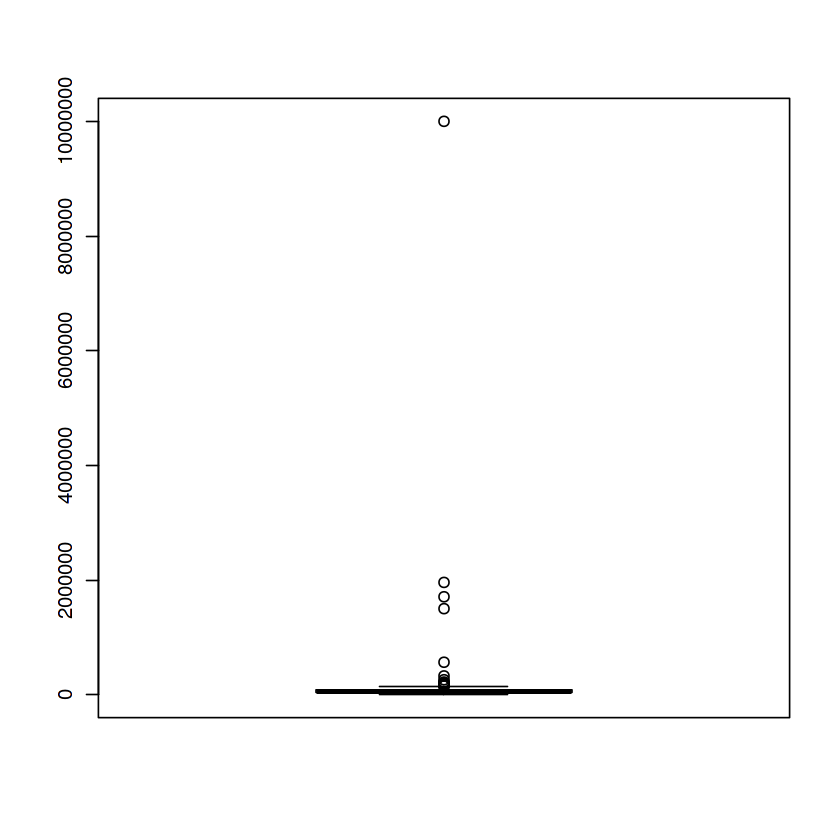

In [ ]:
boxplot(data$unit_price)

In [ ]:
which(data$unit_price>1000000)

[1]  80 167 192 440

In [ ]:
data1=data[-c(80,167,192,440),]
attach(data1)

The following objects are masked _by_ .GlobalEnv:

    city, frame_type


The following objects are masked from data (pos = 3):

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price


The following objects are masked from data2:

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price


The following objects are masked from data1 (pos = 25):

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price


The following objects are masked from data (pos = 26):

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price




In [ ]:
summary(data1$unit_price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      4   40000   56316   63145   83575  565584 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



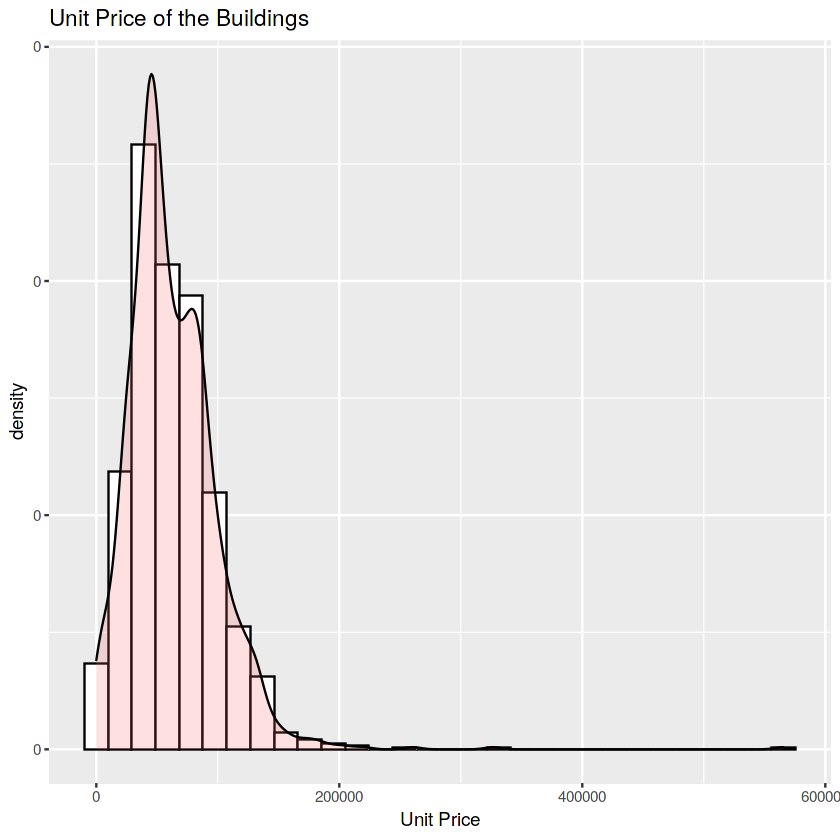

In [ ]:
ggplot(data1, aes(x=unit_price)) + 
  geom_histogram(aes(y=..density..), colour="black", fill="white")+
  geom_density(alpha=.2, fill="#FF6666")+ 
  labs(title="Unit Price of the Buildings",
       x = "Unit Price")

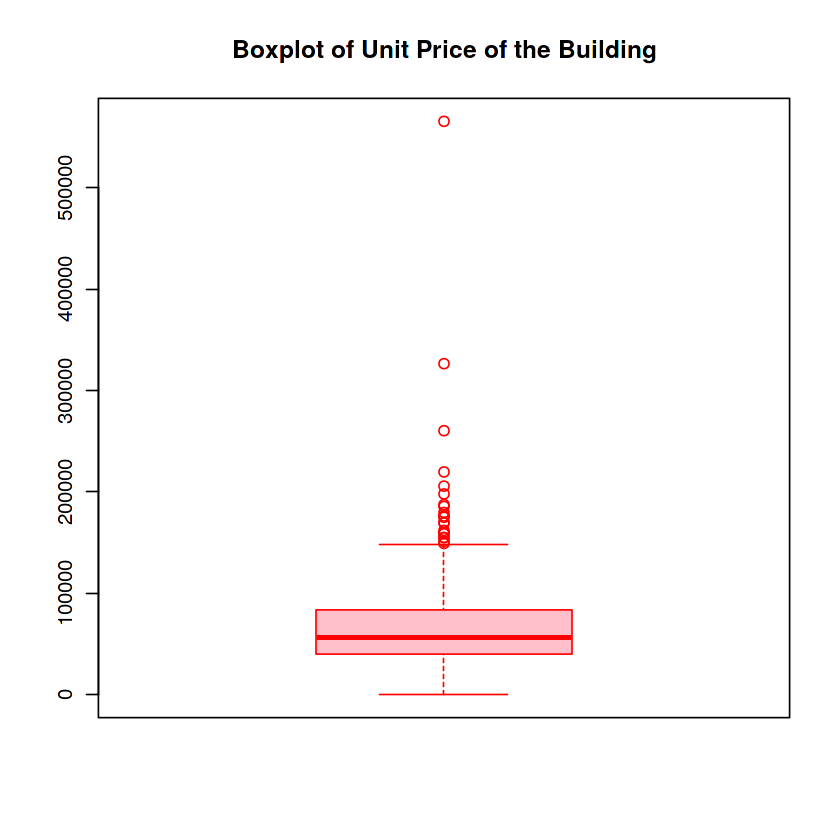

In [ ]:
boxplot(data1$unit_price,main = "Boxplot of Unit Price of the Building",col = "pink",
        border = "red")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



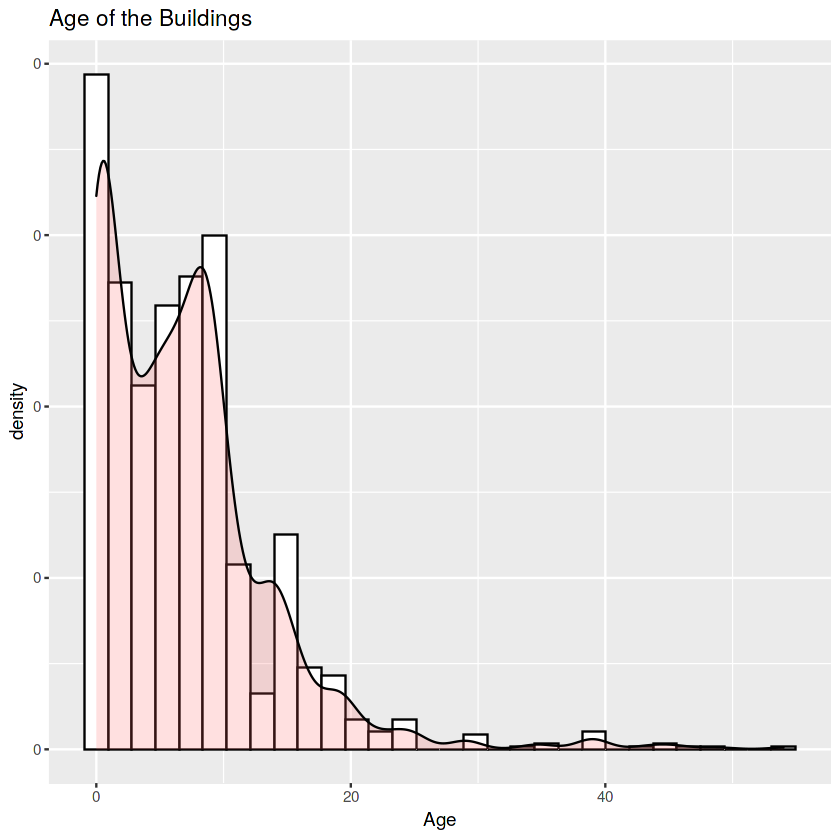

In [ ]:
ggplot(data1, aes(x=age)) + 
  geom_histogram(aes(y=..density..), colour="black", fill="white")+
  geom_density(alpha=.2, fill="#FF6666")+ 
  labs(title="Age of the Buildings",
       x = "Age")

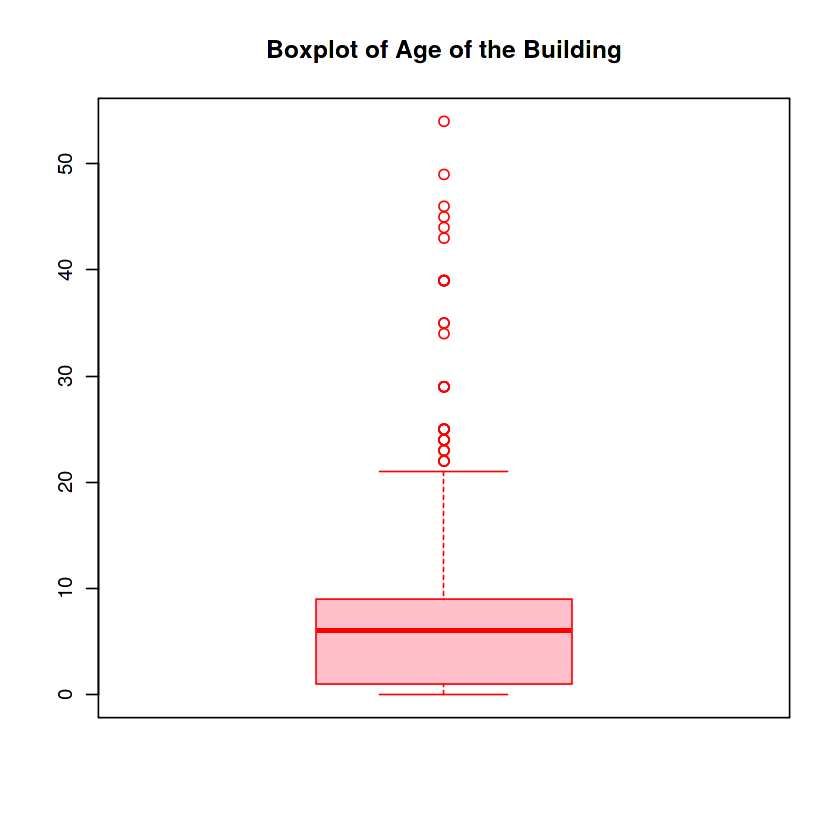

In [ ]:
boxplot(data1$age,main = "Boxplot of Age of the Building",col = "pink",
        border = "red")

In [ ]:
summary(data1$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       1       6       7       9      54 

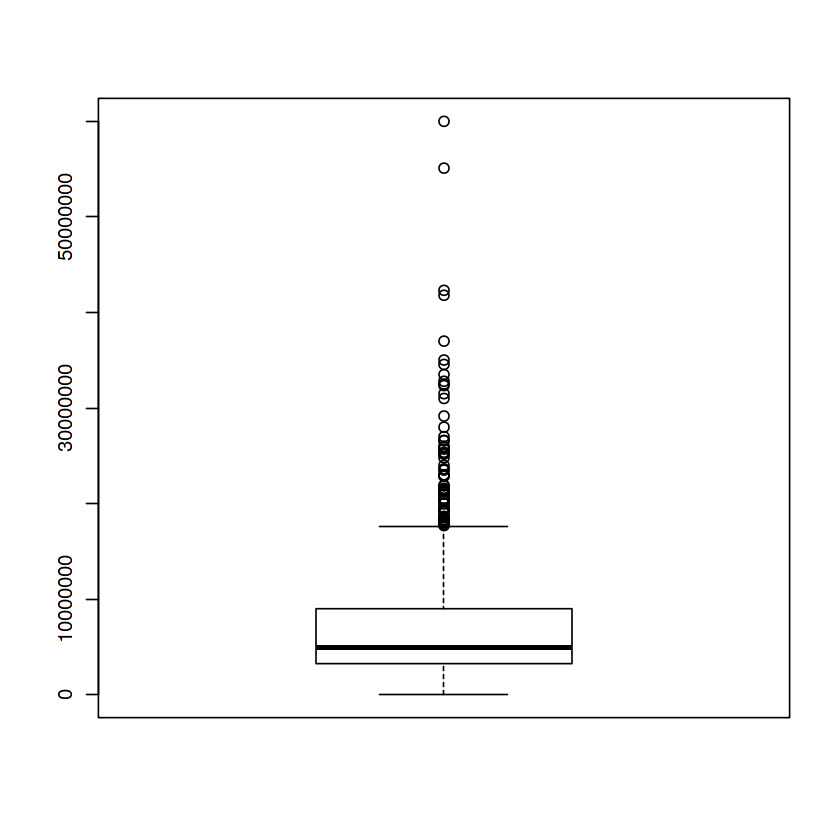

In [ ]:
boxplot(data1$price)

In [ ]:
summary(data1$price)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    4020  3250000  4900000  6967862  9000000 60000000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



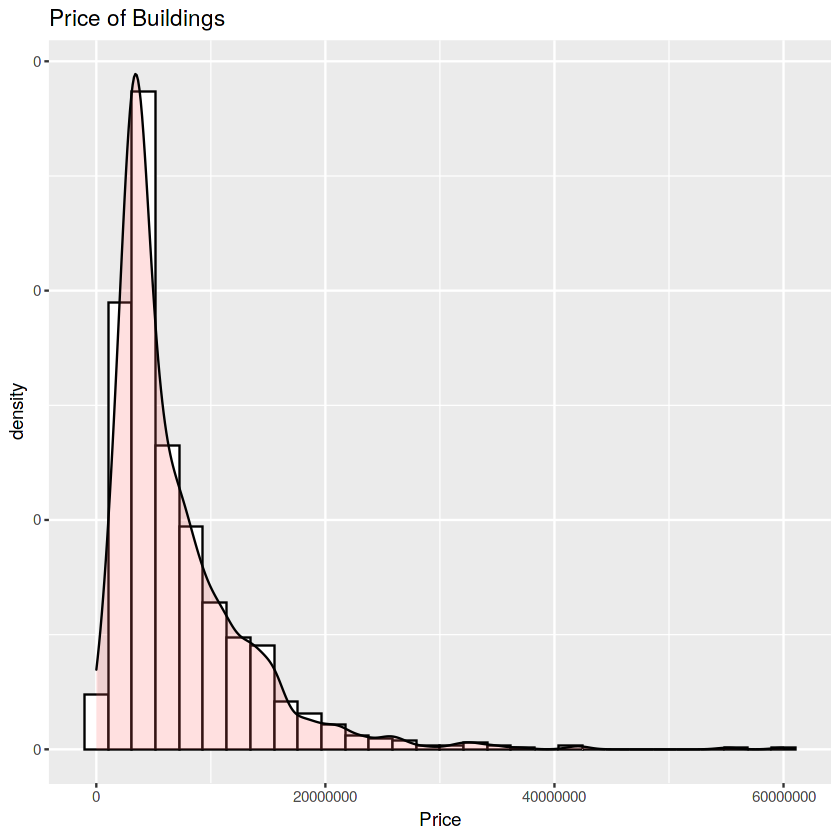

In [ ]:
ggplot(data1, aes(x=price)) + 
  geom_histogram(aes(y=..density..), colour="black", fill="white")+
  geom_density(alpha=.2, fill="#FF6666")+ 
  labs(title="Price of Buildings",
       x = "Price")

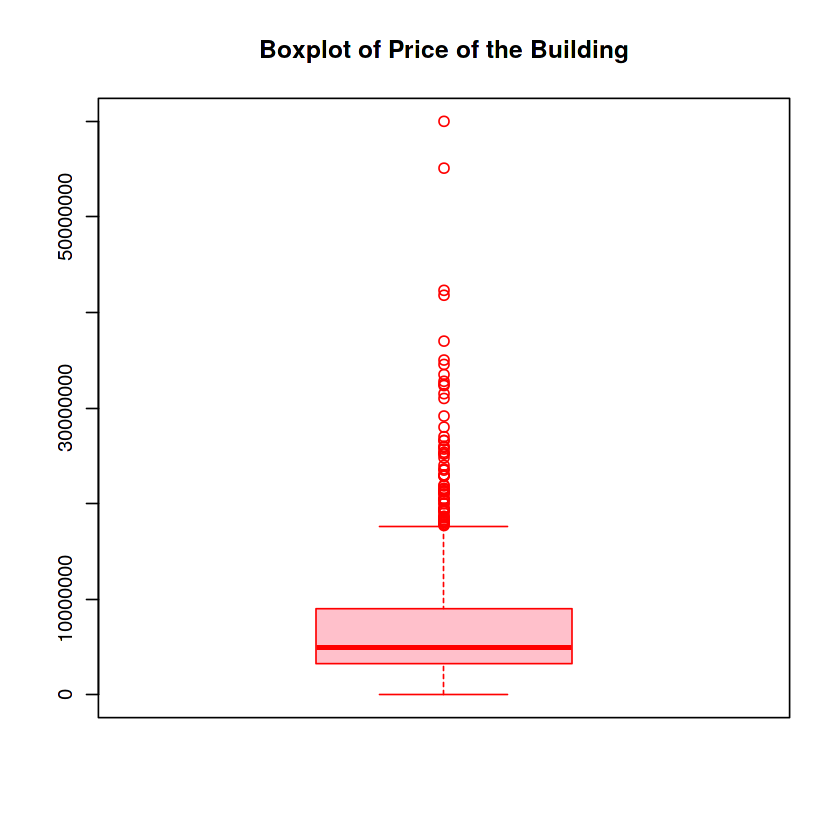

In [ ]:
boxplot(data1$price,main = "Boxplot of Price of the Building",col = "pink",
        border = "red")

In [ ]:
summary(data1$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      8      75      90     149     120   13063 

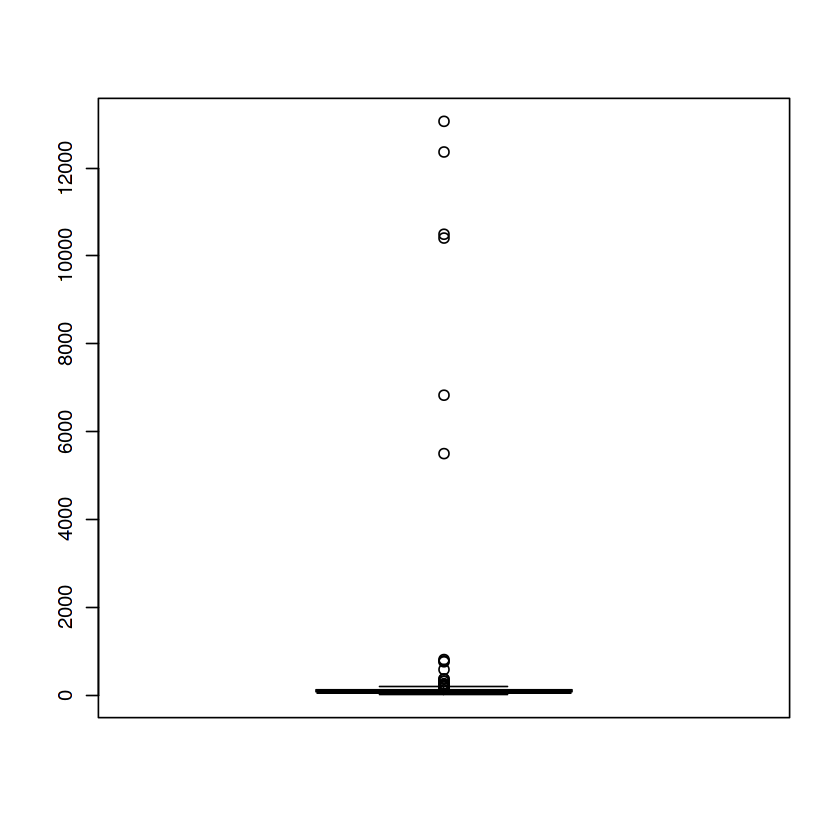

In [ ]:
boxplot(data1$area)

In [ ]:
data1$area[data1$area > 1000]

[1] 12365  6827 10492  5497 10405 13063

In [ ]:
which(data1$area==12365)
which(data1$area==6827)
which(data1$area==10492)
which(data1$area==5497)
which(data1$area==10405)
which(data1$area==13063)


[1] 94

[1] 372

[1] 401

[1] 982

[1] 1058

[1] 1211

In [ ]:
data2=data1[-c(94,372,401,982,1058,1211),]

In [ ]:
attach(data2)

The following objects are masked _by_ .GlobalEnv:

    city, frame_type


The following objects are masked from data1 (pos = 3):

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price


The following objects are masked from data (pos = 4):

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price


The following objects are masked from data2 (pos = 25):

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price


The following objects are masked from data1 (pos = 26):

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price


The following objects are masked from data (pos = 27):

    age, area, city, contract_date, contract_id, frame_type,
    percentage, postal_code, price, province, region, unit_price




`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



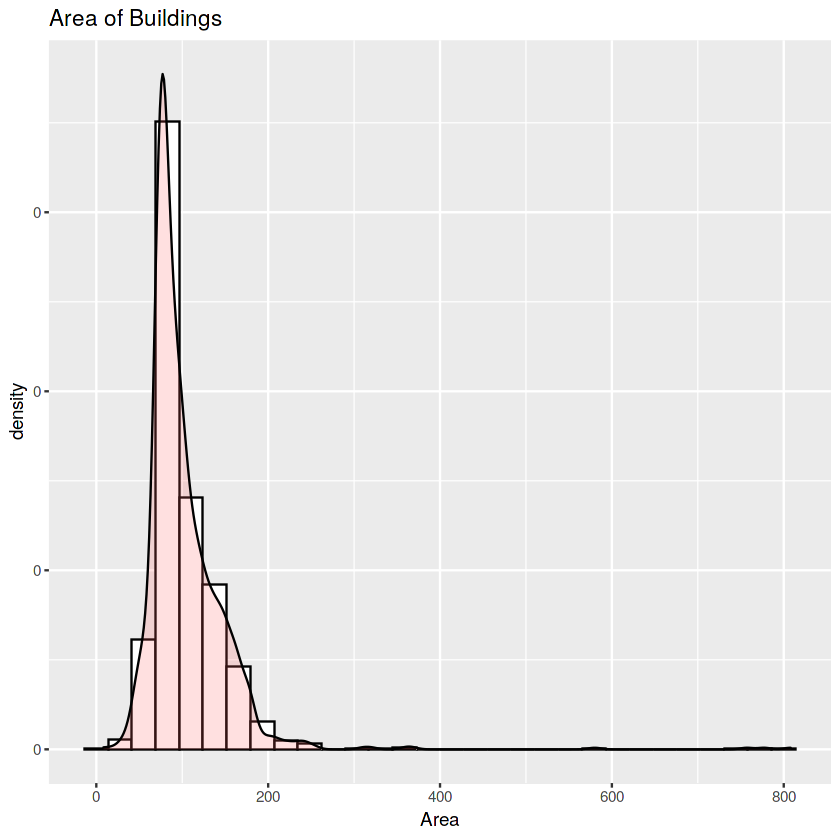

In [ ]:
ggplot(data2, aes(x=area)) + 
  geom_histogram(aes(y=..density..), colour="black", fill="white")+
  geom_density(alpha=.2, fill="#FF6666")+ 
  labs(title="Area of Buildings",
       x = "Area")

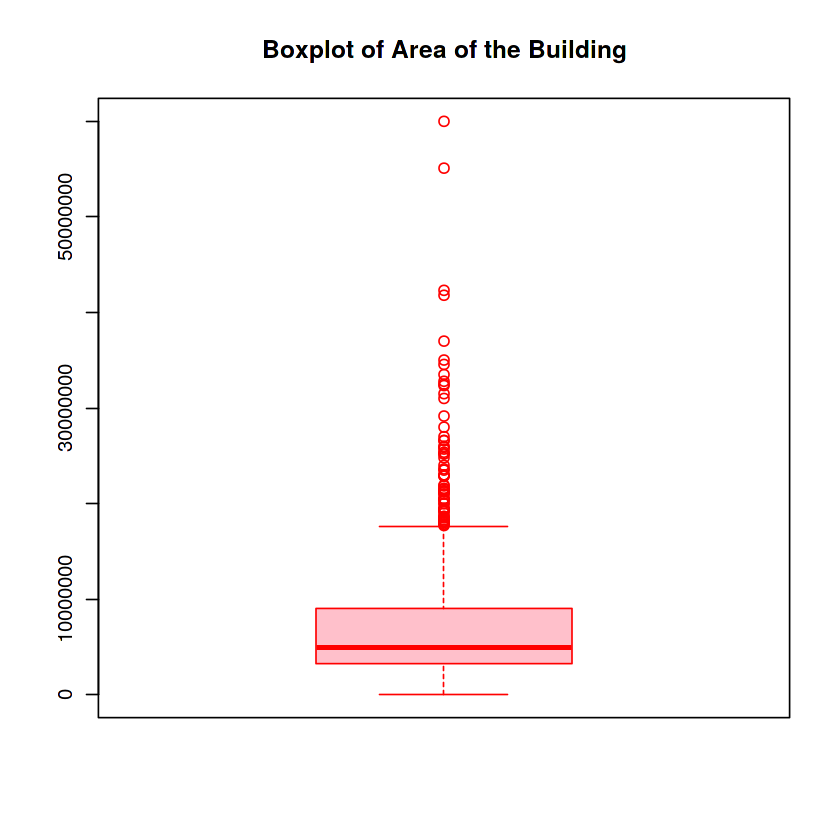

In [ ]:
boxplot(data2$price,main = "Boxplot of Area of the Building",col = "pink",
        border = "red")

In [ ]:
summary(data2$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      8      75      90     103     120     808 

In [ ]:
unique(data2$province)

[1] "كرمانشاه" "كردستان"

In [ ]:
for (i in 1:nrow(data2)){
  if (data2$province[i]=="كردستان"){
    
    data2$province[i]="Kordestan"
    
  }
}
for (i in 1:nrow(data2)){
  if (data2$province[i]=="كرمانشاه"){
    
    data2$province[i]="Kermanshah"
    
  }
}

In [ ]:
unique(data2$province)

[1] "Kermanshah" "Kordestan"

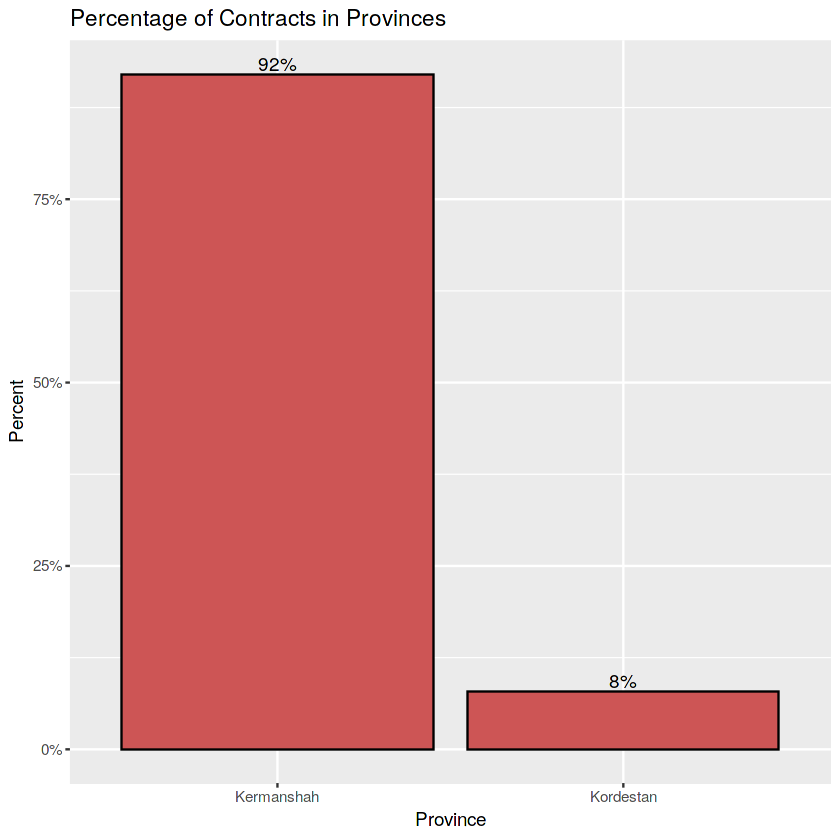

In [ ]:
plotdata <- data2%>% 
  count(province) %>% 
  mutate(pct = n / sum(n),
         pctlabel = paste0(round(pct*100), "%"))

ggplot(plotdata,
       aes(x = reorder(province, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "indianred3",
           color = "black") + geom_text(aes(label = pctlabel),
                                        vjust = -0.25) + scale_y_continuous(labels = percent) +
  labs(x = "Province",
       y = "Percent",
       title = "Percentage of Contracts in Provinces")


Kermanshah  Kordestan 
      1149         99 

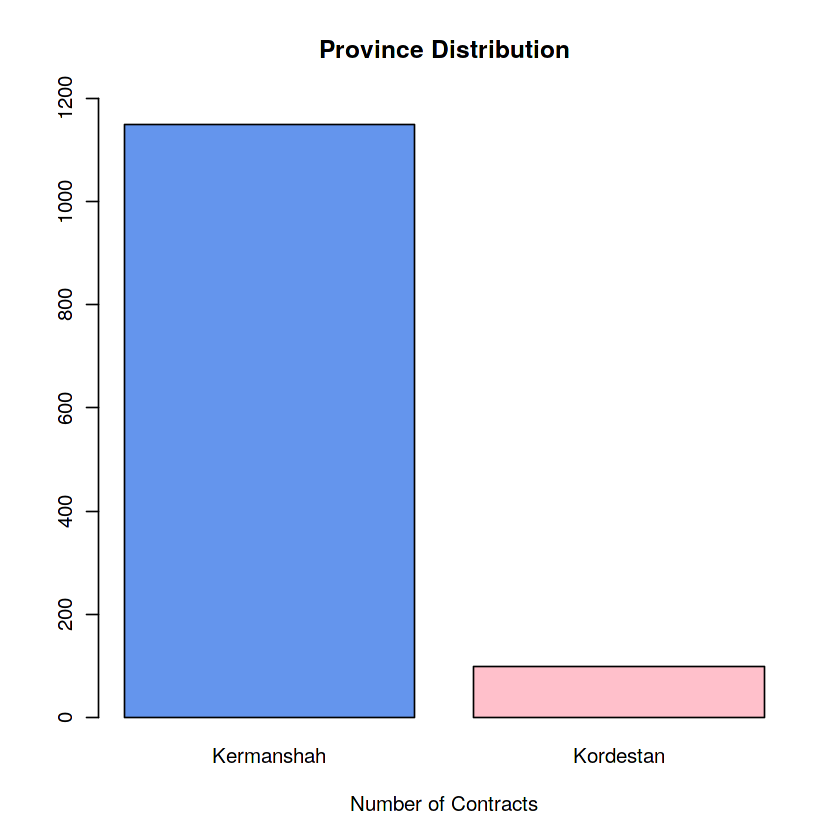

In [ ]:
table(data2$province)
barplot(table(data2$province),main="Province Distribution",xlab="Number of Contracts",col=c("cornflowerblue","pink"),ylim=c(0,1200))

[1] "concrete"                "concrete and metal"     
[3] "metal"                   "No Frame"               
[5] "brick or concrete block"

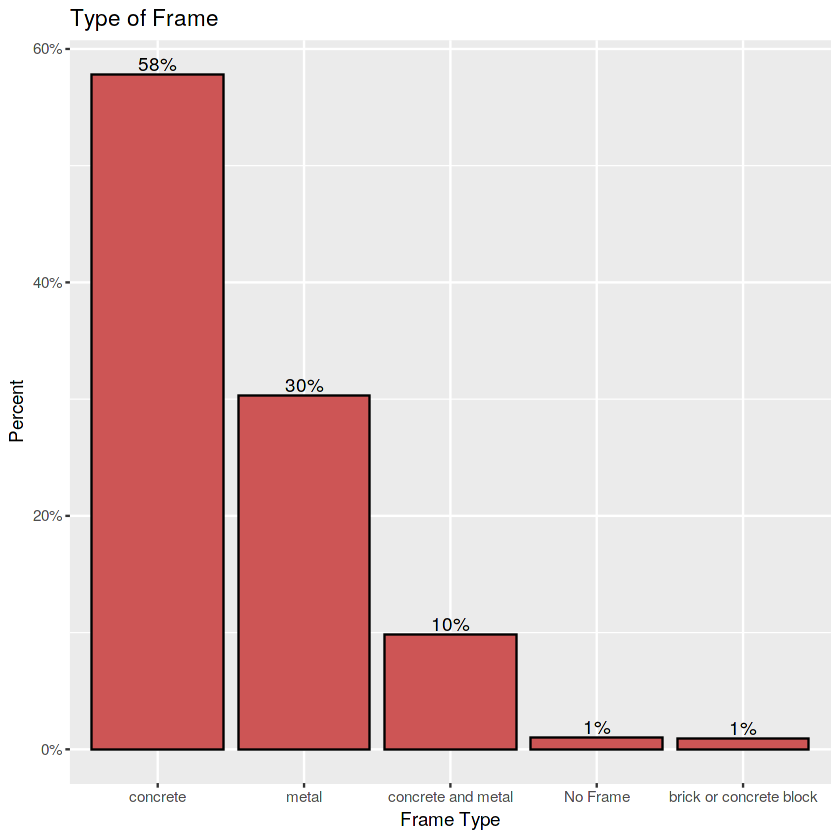

In [ ]:
unique(data2$frame_type)

plotdata <- data2%>% 
  count(frame_type) %>% 
  mutate(pct = n / sum(n),
         pctlabel = paste0(round(pct*100), "%"))

ggplot(plotdata,
       aes(x = reorder(frame_type, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "indianred3",
           color = "black") + geom_text(aes(label = pctlabel),
                                        vjust = -0.25) + scale_y_continuous(labels = percent) +
  labs(x = "Frame Type",
       y = "Percent",
       title = "Type of Frame")

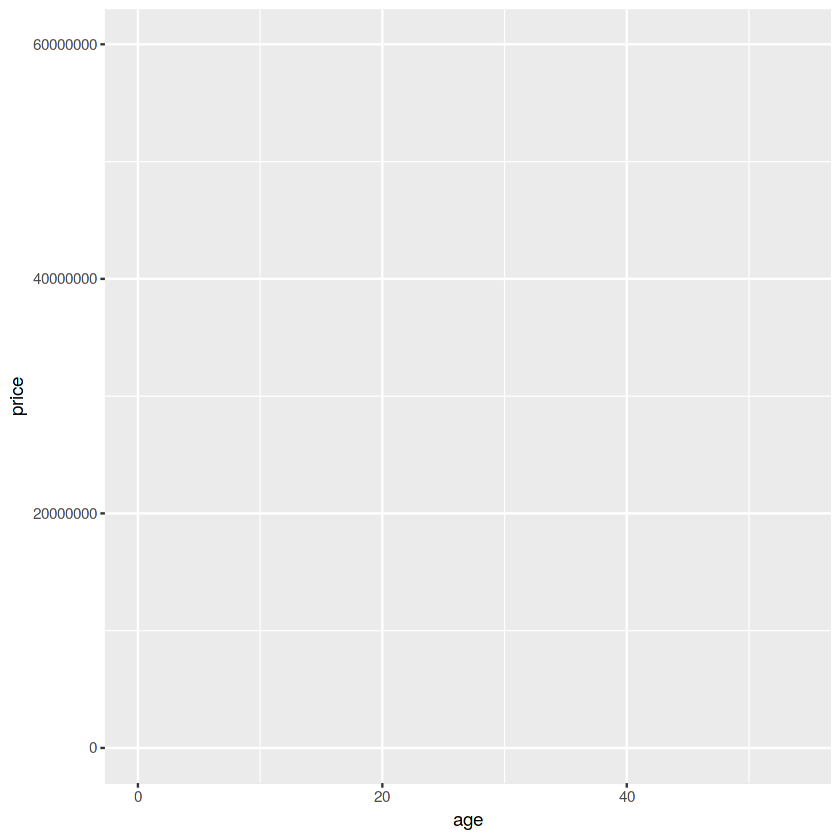

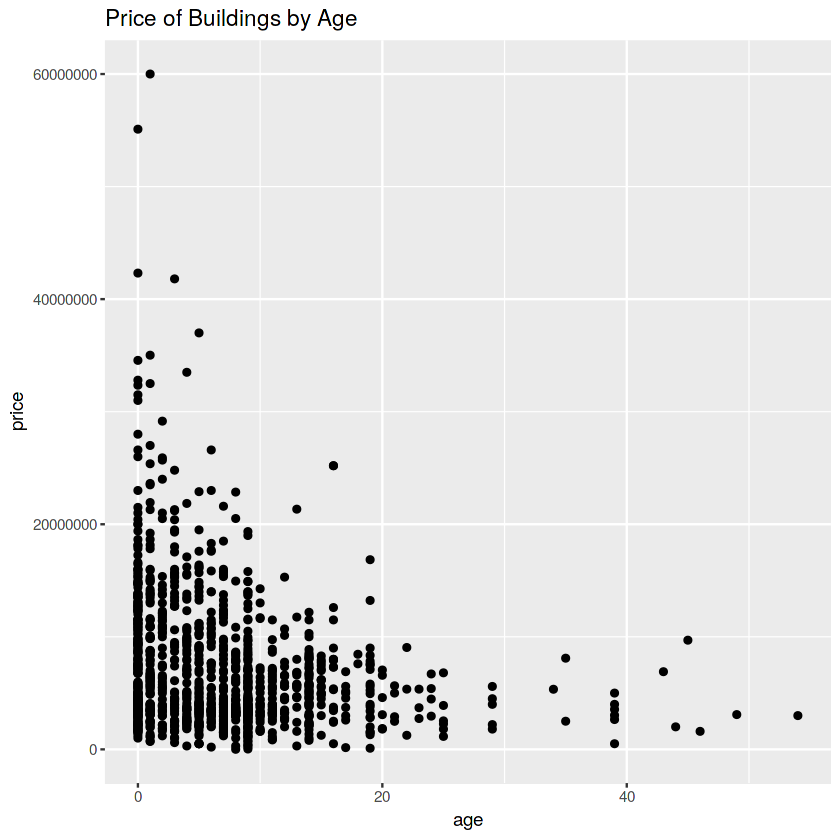

In [ ]:
ggplot(data = data2,
       mapping = aes(x = age, y = price))
ggplot(data = data2,
       mapping = aes(x = age, y = price)) +
  geom_point() + 
  labs(title = "Price of Buildings by Age")

`geom_smooth()` using formula 'y ~ x'



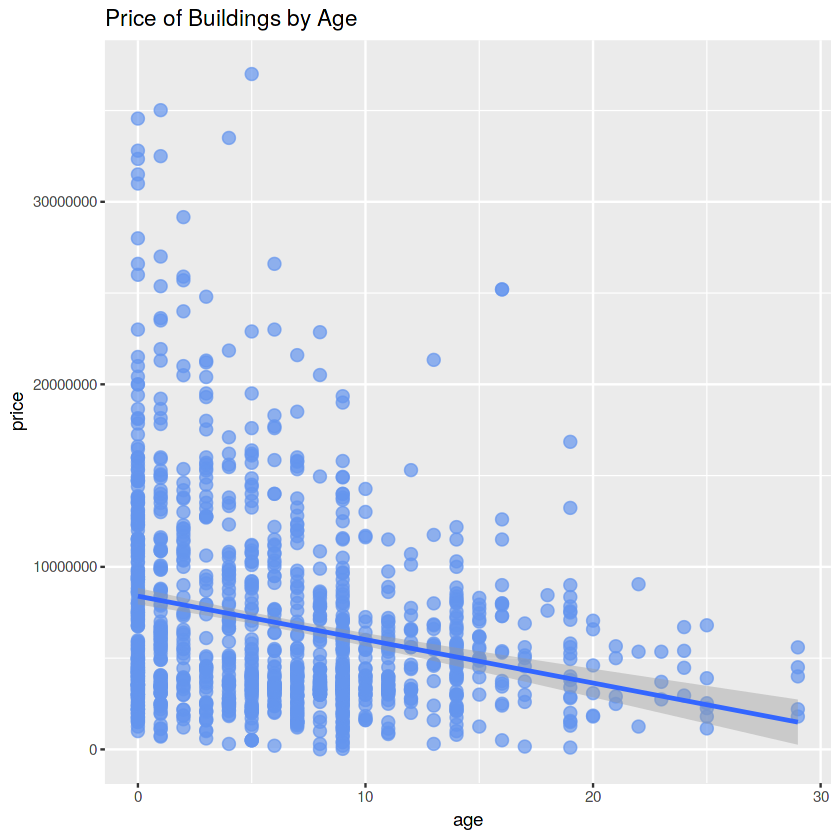

In [ ]:
plotdata <- filter(data2,  price < 4.0e+07, age < 30)
ggplot(data = plotdata,
       mapping = aes(x = age, y = price)) +
  geom_point(color = "cornflowerblue", alpha = .7,
             size = 3) + geom_smooth(method = "lm") +
  labs(title = "Price of Buildings by Age")

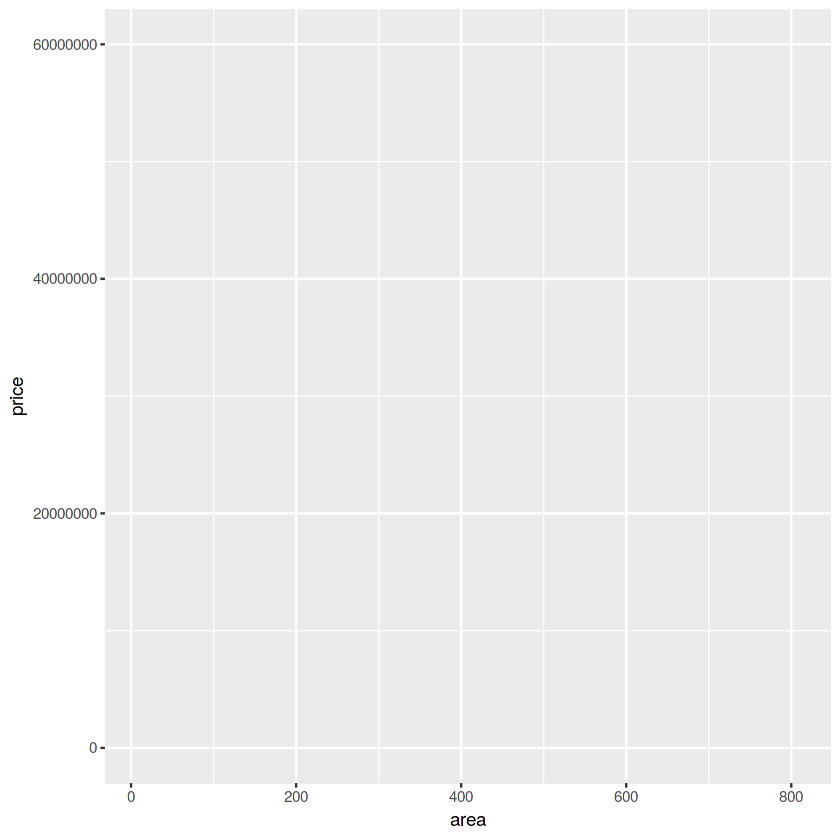

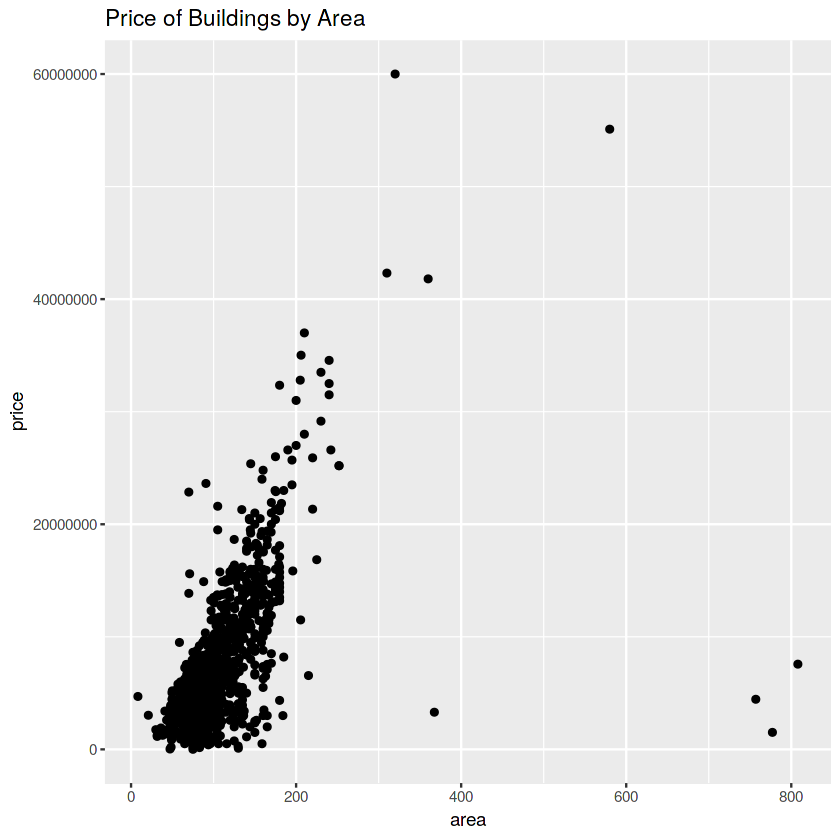

In [ ]:
ggplot(data = data2,
       mapping = aes(x = area, y = price))
ggplot(data = data2,
       mapping = aes(x = area, y = price)) +
  geom_point() +
  labs(title = "Price of Buildings by Area")

`geom_smooth()` using formula 'y ~ x'



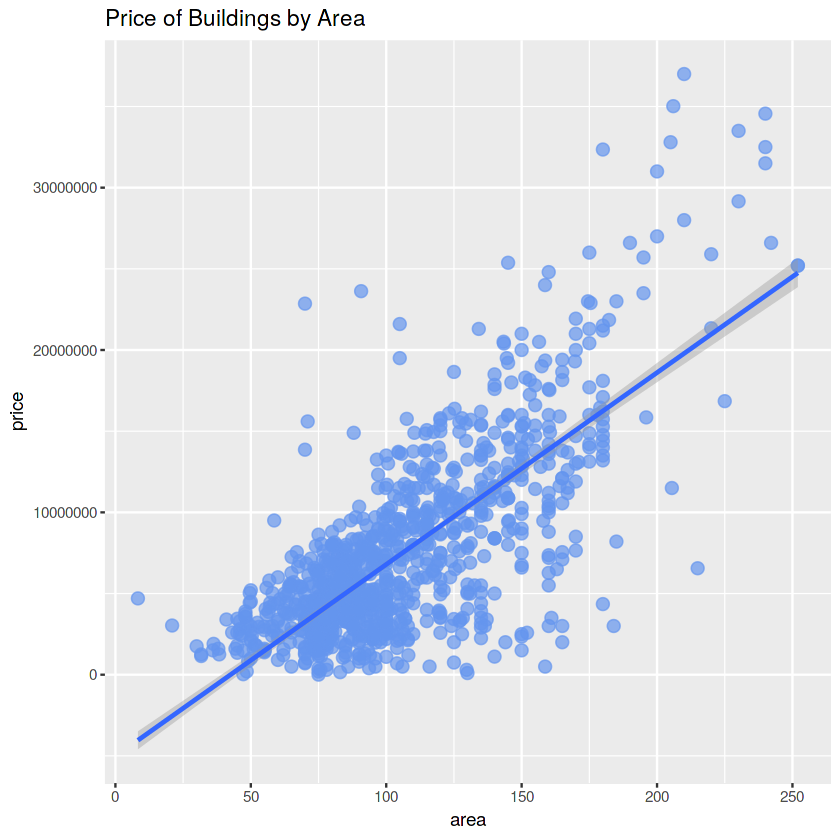

In [ ]:
plotdata <- filter(data2, price < 4.0e+07, area < 300)
ggplot(data = plotdata,
       mapping = aes(x = area, y = price)) +
  geom_point(color = "cornflowerblue", alpha = .7,
             size = 3) + geom_smooth(method = "lm") +
  labs(title = "Price of Buildings by Area")

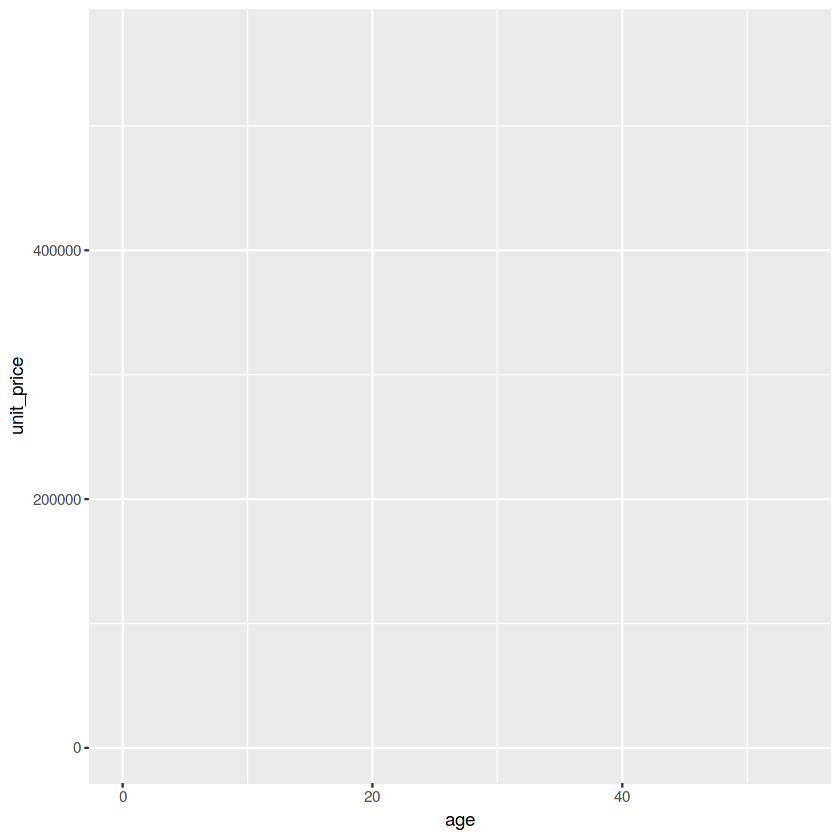

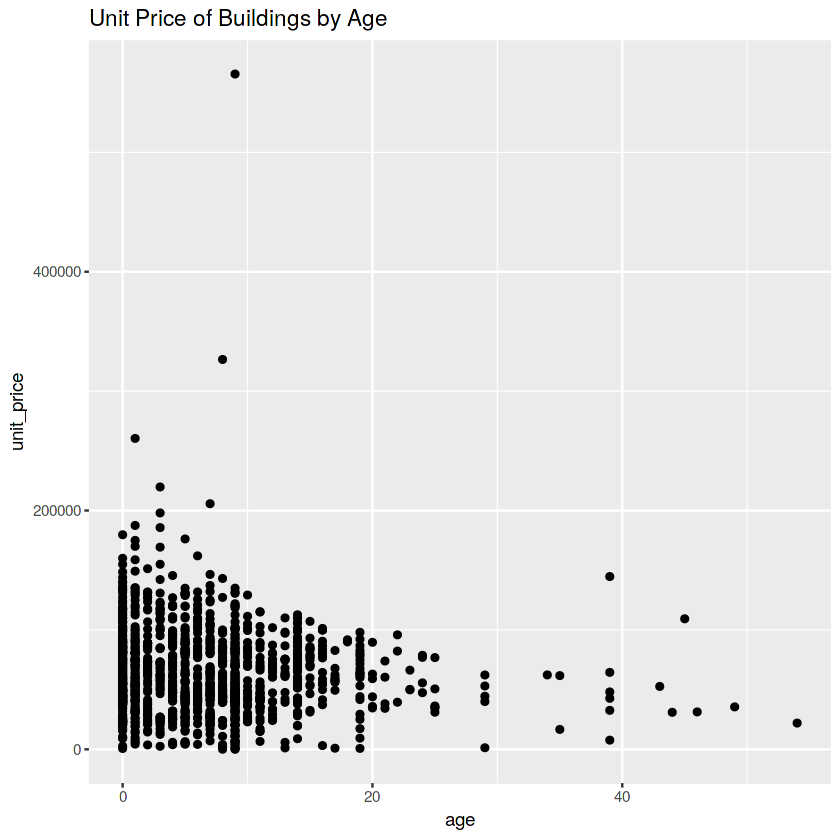

In [ ]:
ggplot(data = data2,
       mapping = aes(x = age, y = unit_price))
ggplot(data = data2,
       mapping = aes(x = age, y = unit_price)) +
  geom_point() + 
  labs(title = "Unit Price of Buildings by Age")

`geom_smooth()` using formula 'y ~ x'



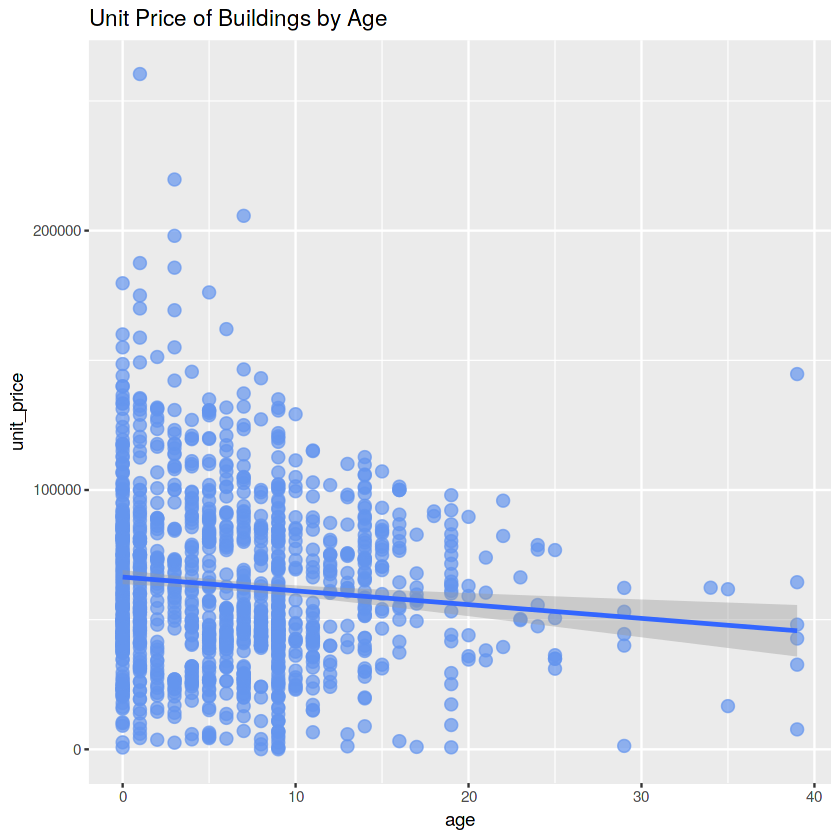

In [ ]:
plotdata <- filter(data2,  unit_price < 3.0e+05, age < 40)
ggplot(data = plotdata,
       mapping = aes(x = age, y = unit_price)) +
  geom_point(color = "cornflowerblue", alpha = .7,
             size = 3) + geom_smooth(method = "lm") +
  labs(title = "Unit Price of Buildings by Age")

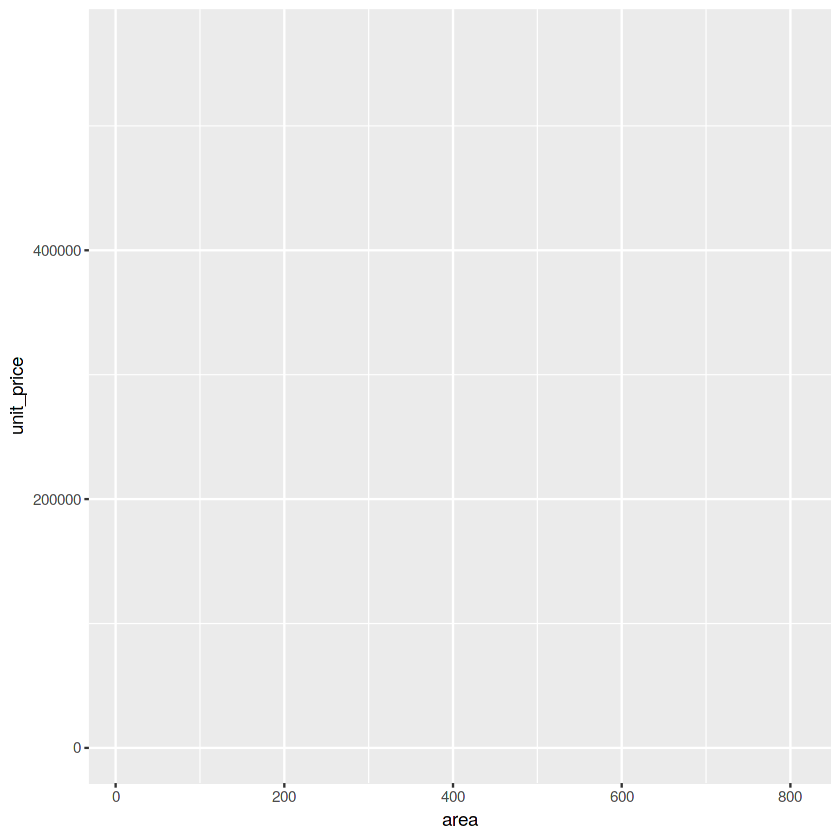

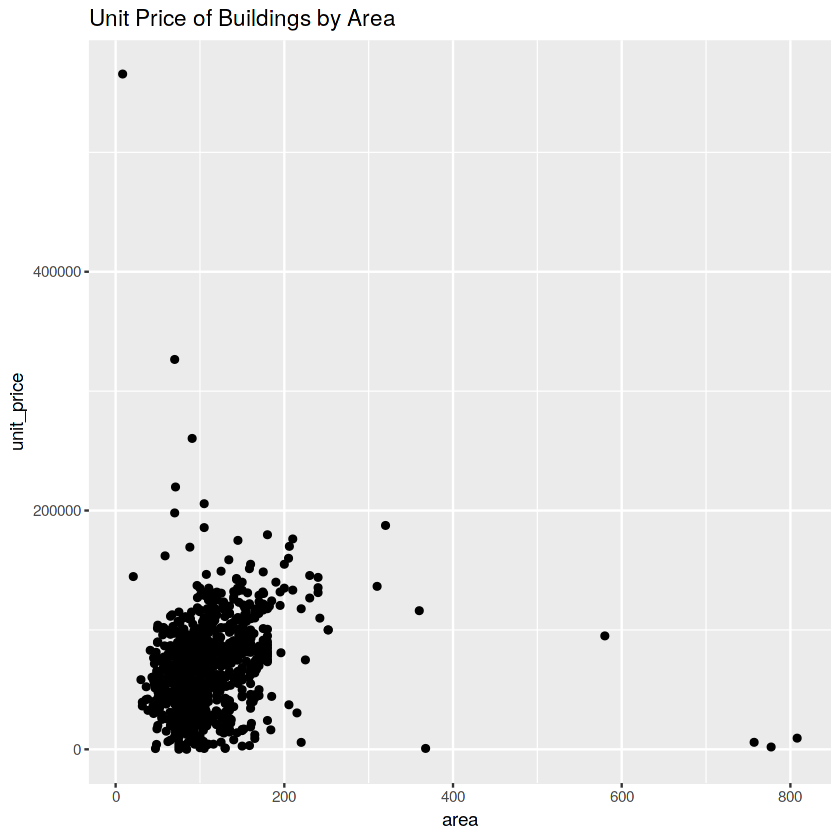

In [ ]:
ggplot(data = data2,
       mapping = aes(x = area, y = unit_price))
ggplot(data = data2,
       mapping = aes(x = area, y = unit_price)) +
  geom_point() +
  labs(title = "Unit Price of Buildings by Area")

`geom_smooth()` using formula 'y ~ x'



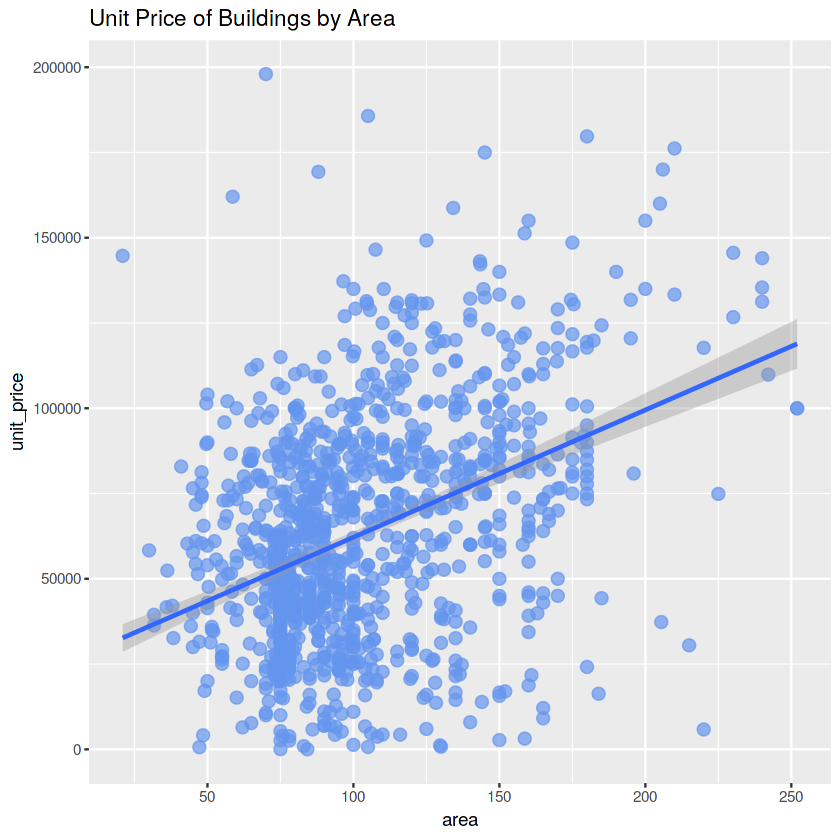

In [ ]:
plotdata <- filter(data2, unit_price < 2.0e+05, area < 300)
ggplot(data = plotdata,
       mapping = aes(x = area, y = unit_price)) +
  geom_point(color = "cornflowerblue", alpha = .7,
             size = 3) + geom_smooth(method = "lm") +
  labs(title = "Unit Price of Buildings by Area")


`geom_smooth()` using formula 'y ~ x'



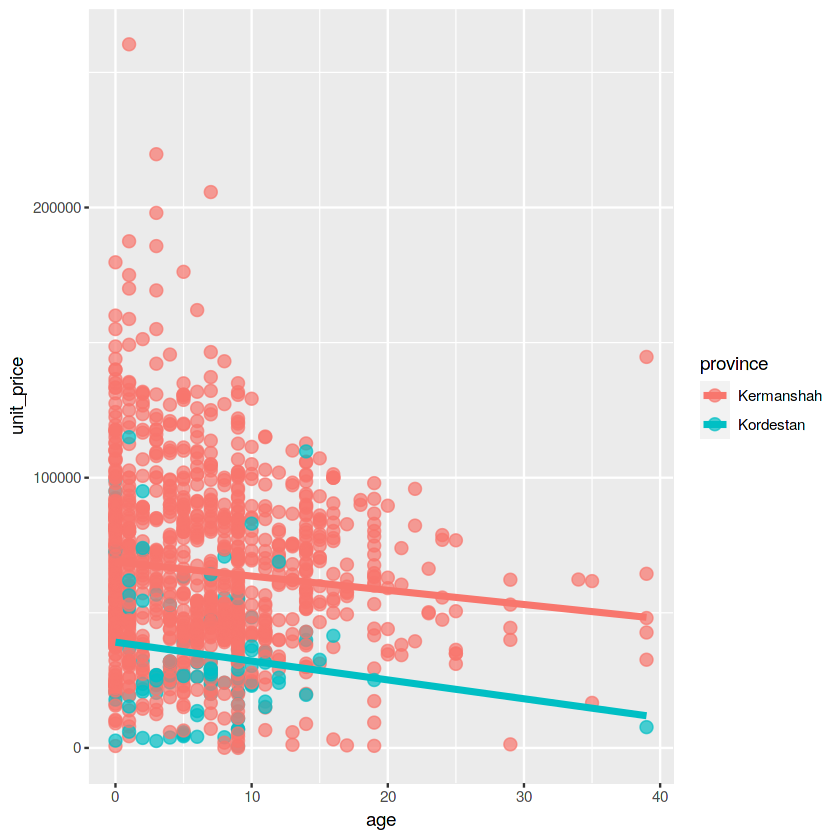

In [ ]:
plotdata <- filter(data2,  unit_price < 3.0e+05, age < 40)
ggplot(data = plotdata, 
       mapping = aes(x = age,
                     y = unit_price,
                     color = province)) + 
  geom_point(alpha = .7,
             size = 3) + geom_smooth(method = "lm",
                                     se = FALSE, size = 1.5)


`geom_smooth()` using formula 'y ~ x'



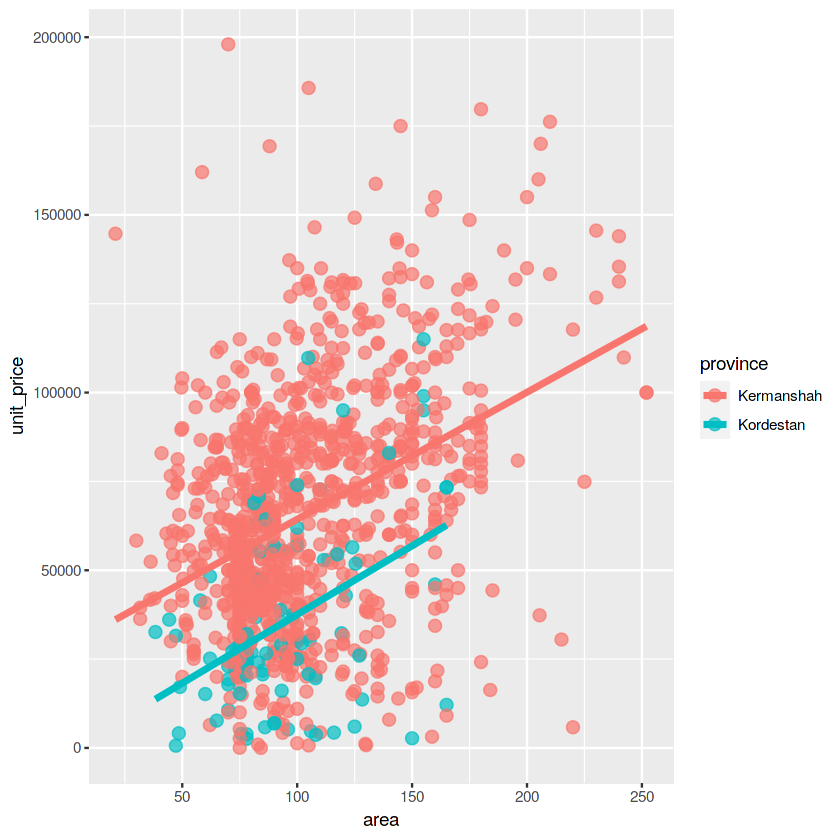

In [ ]:
plotdata <- filter(data2, unit_price < 2.0e+05, area < 300)
ggplot(data = plotdata, 
       mapping = aes(x = area,
                     y = unit_price,
                     color = province)) + 
  geom_point(alpha = .7,
             size = 3) + geom_smooth(method = "lm",
                                     se = FALSE, size = 1.5)

`geom_smooth()` using formula 'y ~ x'



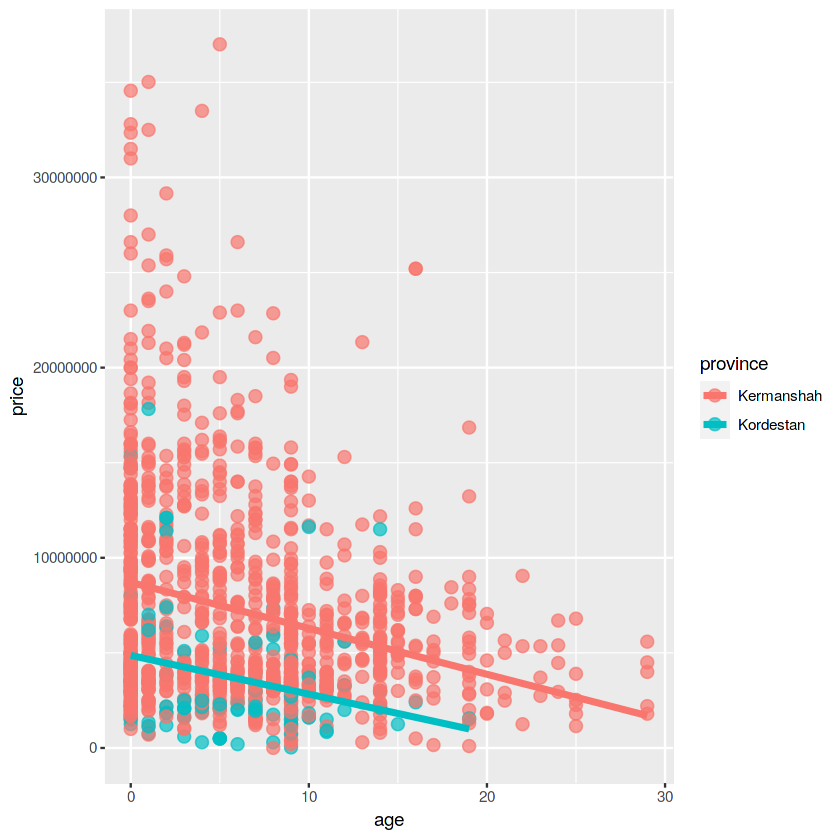

In [ ]:
plotdata <- filter(data2,  price < 4.0e+07, age < 30)
ggplot(data = plotdata, 
       mapping = aes(x = age,
                     y = price,
                     color = province)) + 
  geom_point(alpha = .7,
             size = 3) + geom_smooth(method = "lm",
                                     se = FALSE, size = 1.5)

`geom_smooth()` using formula 'y ~ x'



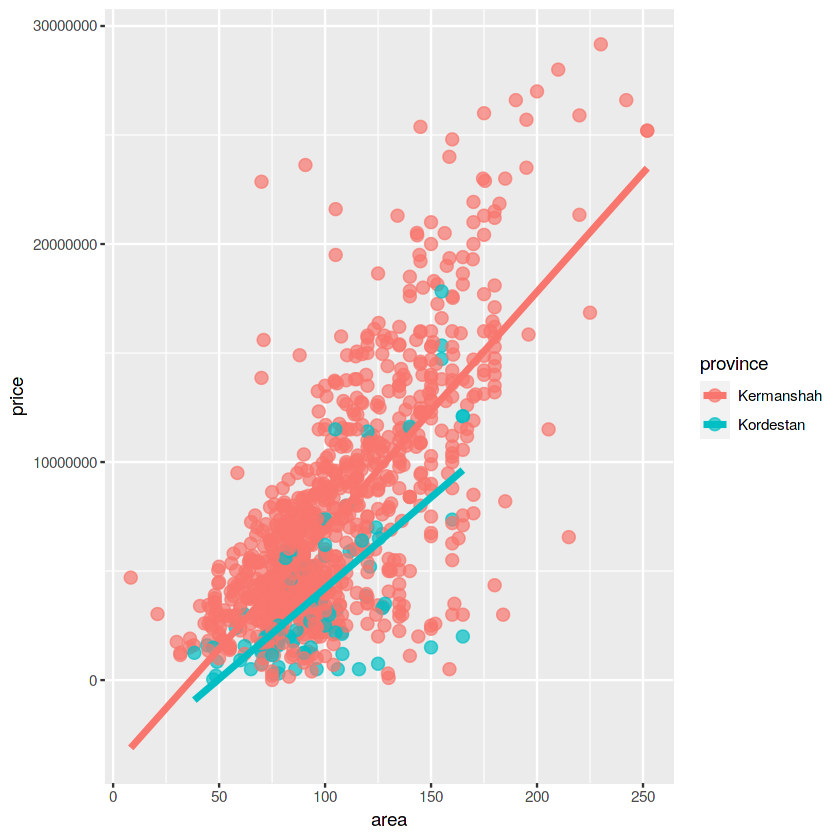

In [ ]:
plotdata <- filter(data2, price < 3.0e+07, area < 300)
ggplot(data = plotdata, 
       mapping = aes(x = area,
                     y = price,
                     color = province)) + 
  geom_point(alpha = .7,
             size = 3) + geom_smooth(method = "lm",
                                     se = FALSE, size = 1.5)

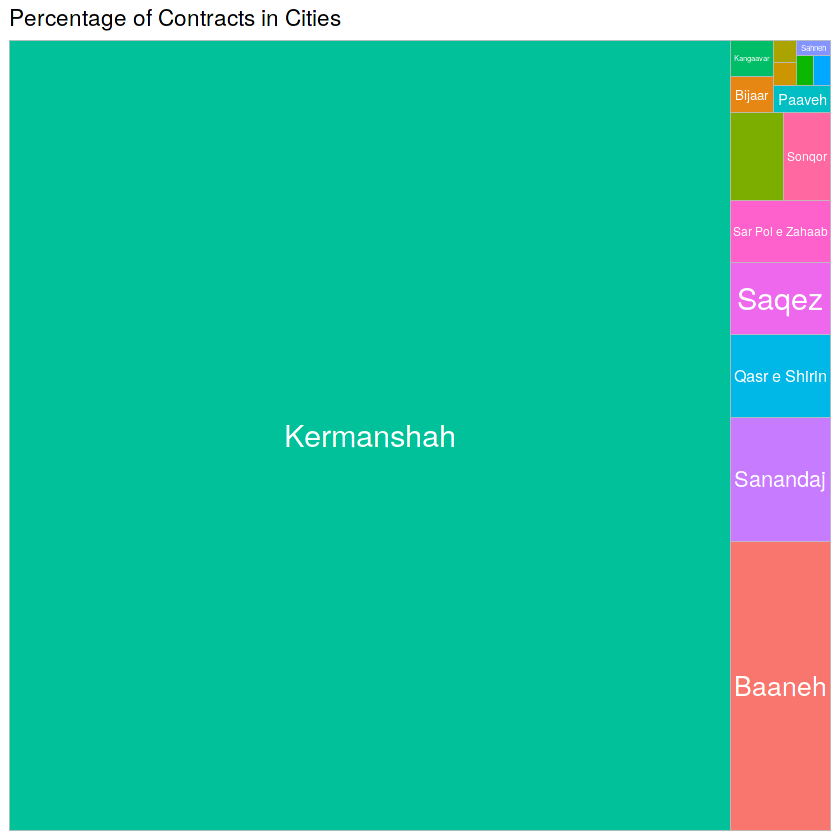

In [ ]:
library(treemapify)

plotdata <- data2 %>% 
  count(city)

ggplot(plotdata,
       aes(fill = city, 
           area = n,
           label = city)) + 
  geom_treemap() +
  geom_treemap_text(colour = "white", 
                    place = "centre") +
  labs(title = "Percentage of Contracts in Cities") + 
  theme(legend.position = "none") 

In [ ]:
data3=data2

In [ ]:
for (i in 1:nrow(data3)){
  if (data3$city[i]=="Paaveh"){
    
    data3$city[i]="Other Cities of Kermanshah"
    
  }
}


for (i in 1:nrow(data3)){
  if (data3$city[i]=="Daalaahoo"){
    
    data3$city[i]="Other Cities of Kermanshah"
    
  }
}


for (i in 1:nrow(data3)){
  if (data3$city[i]=="Qasr e Shirin"){
    
    data3$city[i]="Other Cities of Kermanshah"
    
  }
}




for (i in 1:nrow(data3)){
  if (data3$city[i]=="Sonqor"){
    
    data3$city[i]="Other Cities of Kermanshah"
    
  }
}


for (i in 1:nrow(data3)){
  if (data3$city[i]=="Sahneh"){
    
    data3$city[i]="Other Cities of Kermanshah"
    
  }
}



for (i in 1:nrow(data3)){
  if (data3$city[i]=="Eslaam Abad e Qarb"){
    
    data3$city[i]="Other Cities of Kermanshah"
    
  }
}


for (i in 1:nrow(data3)){
  if (data3$city[i]=="Sar Pol e Zahaab"){
    
    data3$city[i]="Other Cities of Kermanshah"
    
  }
}

for (i in 1:nrow(data3)){
  if (data3$city[i]=="Kangaavar"){
    
    data3$city[i]="Other Cities of Kermanshah"
    
  }
}


for (i in 1:nrow(data3)){
  if (data3$city[i]=="Harsin"){
    
    data3$city[i]="Other Cities of Kermanshah"
    
  }
}

for (i in 1:nrow(data3)){
  if (data3$city[i]=="Baaneh"){
    
    data3$city[i]="Other Cities of Kordestan"
    
  }
}
for (i in 1:nrow(data3)){
  if (data3$city[i]=="Bijaar"){
    
    data3$city[i]="Other Cities of Kordestan"
    
  }
}
for (i in 1:nrow(data3)){
  if (data3$city[i]=="Saqez"){
    
    data3$city[i]="Other Cities of Kordestan"
    
  }
}
for (i in 1:nrow(data3)){
  if (data3$city[i]=="Qorveh"){
    
    data3$city[i]="Other Cities of Kordestan"
    
  }
}
for (i in 1:nrow(data3)){
  if (data3$city[i]=="Divaan Dareh"){
    
    data3$city[i]="Other Cities of Kordestan"
    
  }
}
unique(data3$city)


[1] "Kermanshah"                 "Other Cities of Kermanshah"
[3] "Other Cities of Kordestan"  "Sanandaj"

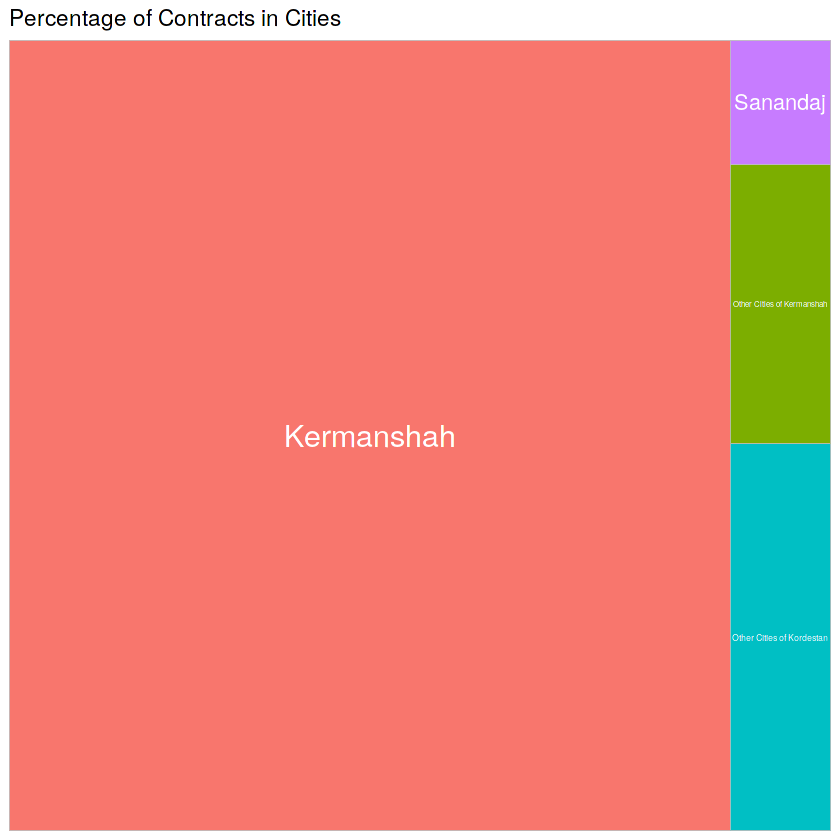

In [ ]:
plotdata <- data3 %>% 
  count(city)

ggplot(plotdata,
       aes(fill = city, 
           area = n,
           label = city)) + 
  geom_treemap() +
  geom_treemap_text(colour = "white", 
                    place = "centre") +
  labs(title = "Percentage of Contracts in Cities") + 
  theme(legend.position = "none") 

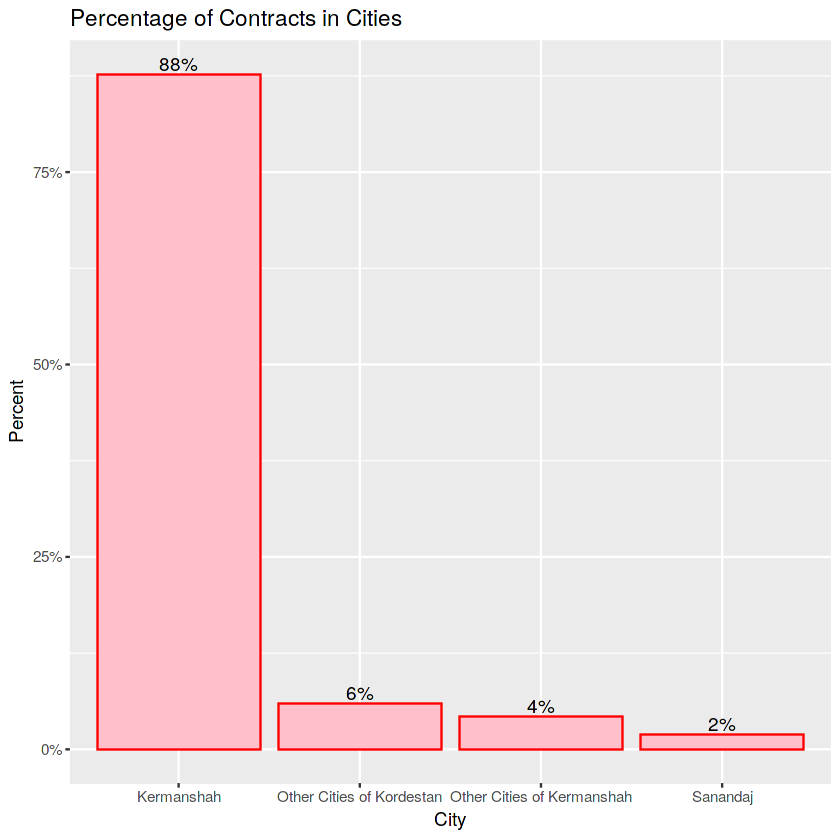

In [ ]:
plotdata <- data3%>% 
  count(city) %>% 
  mutate(pct = n / sum(n),
         pctlabel = paste0(round(pct*100), "%"))

ggplot(plotdata,
       aes(x = reorder(city, -pct), y = pct)) +
  geom_bar(stat = "identity", fill = "pink",
           color = "red") + geom_text(aes(label = pctlabel),
                                        vjust = -0.25) + scale_y_continuous(labels = percent) +
  labs(x = "City",
       y = "Percent",
       title = "Percentage of Contracts in Cities")

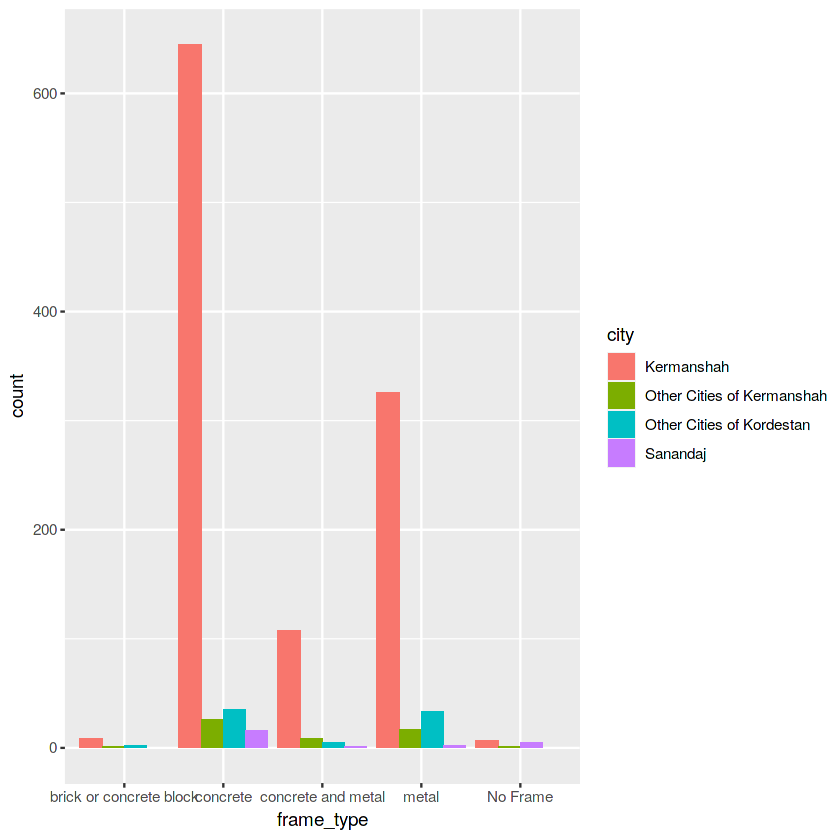

In [ ]:
ggplot(data3,
       aes(x = frame_type,
           fill = city)) +
  geom_bar(position = position_dodge(preserve = "single"))

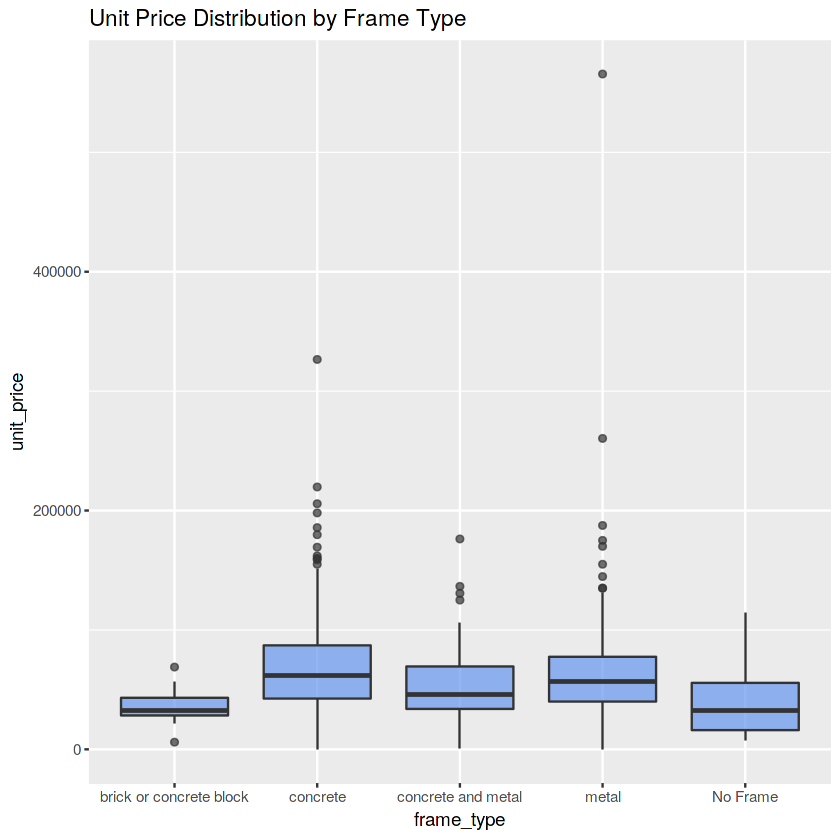

In [ ]:
ggplot(data3, aes(x = frame_type,
                     y = unit_price)) +
  geom_boxplot(fill = "cornflowerblue",
               alpha = .7) +
  labs(title = "Unit Price Distribution by Frame Type")

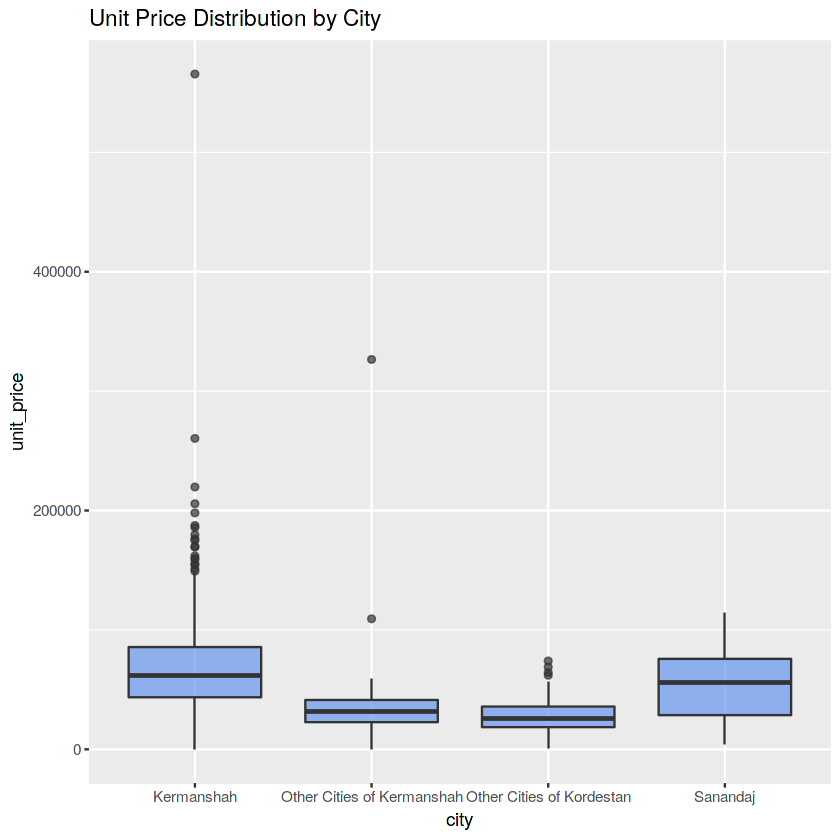

In [ ]:
ggplot(data3, aes(x = city,
                     y = unit_price)) +
  geom_boxplot(fill = "cornflowerblue",
               alpha = .7) +
  labs(title = "Unit Price Distribution by City")

Picking joint bandwidth of 9360



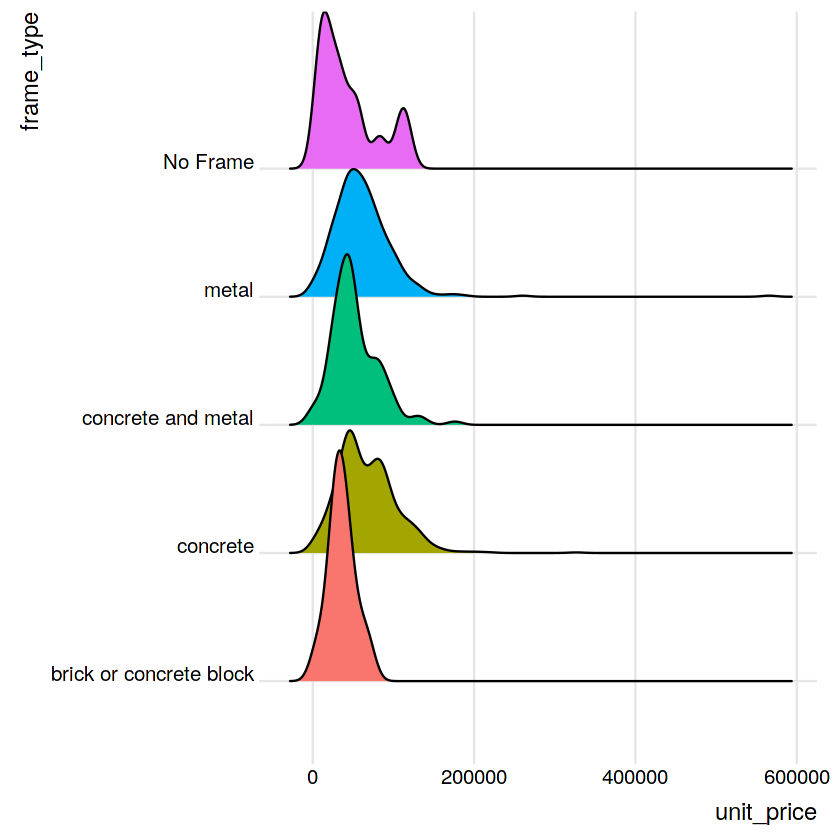

In [ ]:
library(ggplot2) 
library(ggridges)
ggplot(data3,
       aes(x = unit_price,
           y = frame_type,
           fill = frame_type)) + 
  geom_density_ridges() +
  theme_ridges() +
  labs("Highway mileage by auto class") + 
  theme(legend.position = "none")

Picking joint bandwidth of 8340



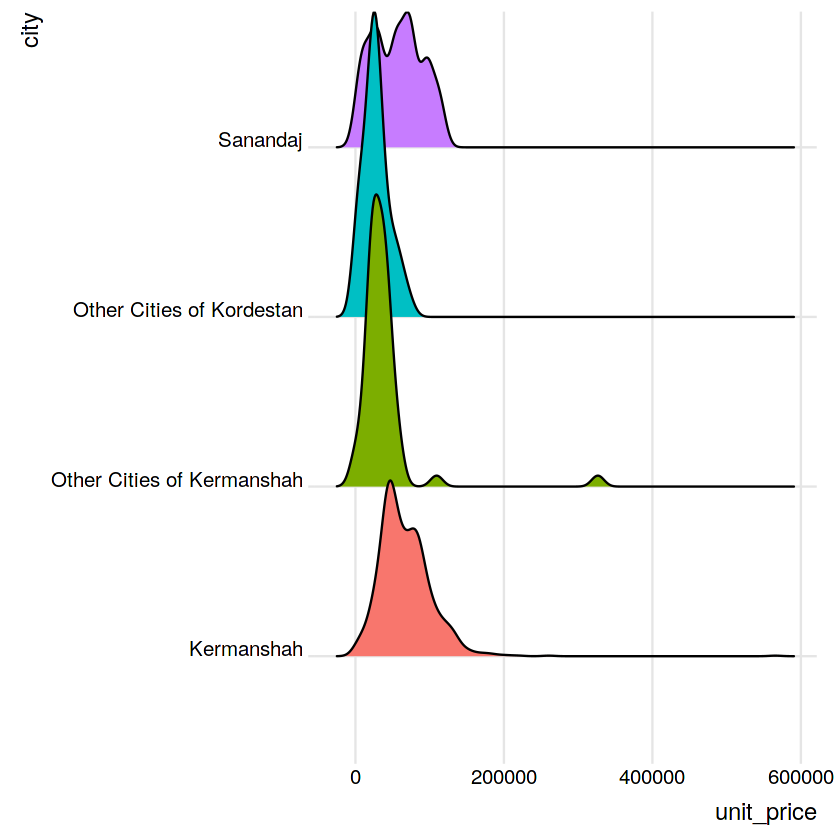

In [ ]:
library(ggplot2) 
library(ggridges)
ggplot(data3,
       aes(x = unit_price,
           y = city,
           fill = city)) + 
  geom_density_ridges() +
  theme_ridges() +
  labs("Highway mileage by auto class") + 
  theme(legend.position = "none")

`summarise()` ungrouping output (override with `.groups` argument)



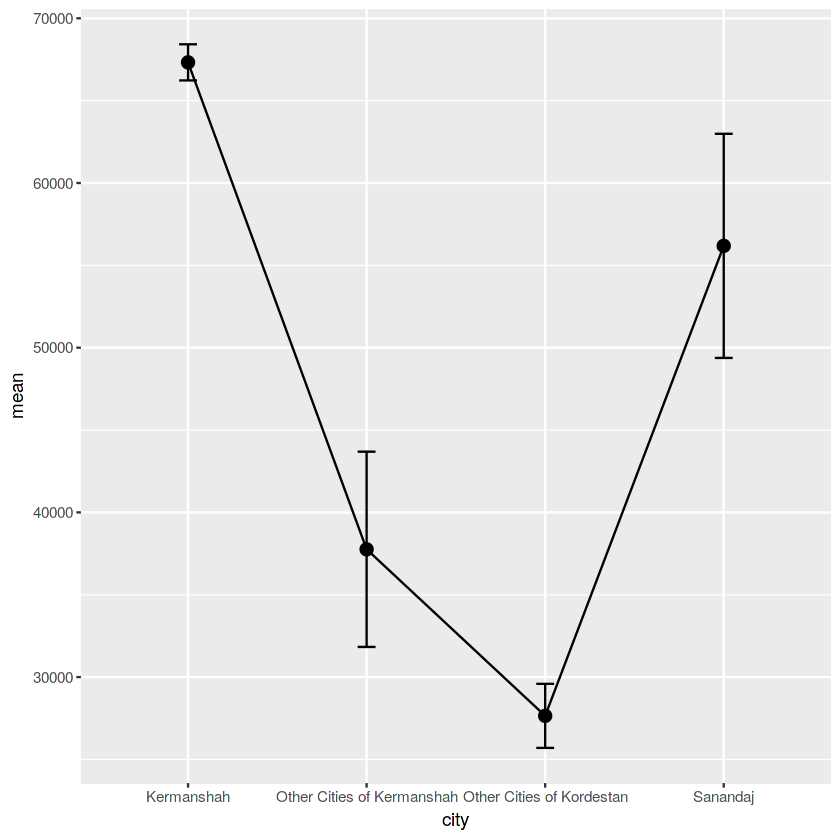

In [ ]:
library(dplyr)

plotdata <- data3 %>% 
  group_by(city) %>% 
  summarize(n = n(),
          mean = mean(unit_price),
          sd = sd(unit_price),
          se = sd / sqrt(n),
          ci = qt(0.975, df = n - 1) * sd / sqrt(n))

ggplot(plotdata, aes(x = city,
                     y = mean,
                     group = 1)) + 
  geom_point(size = 3) +
  geom_line() + 
  geom_errorbar(aes(ymin = mean - se,
                    ymax = mean + se), 
                width = .1)

`summarise()` regrouping output by 'frame_type' (override with `.groups` argument)



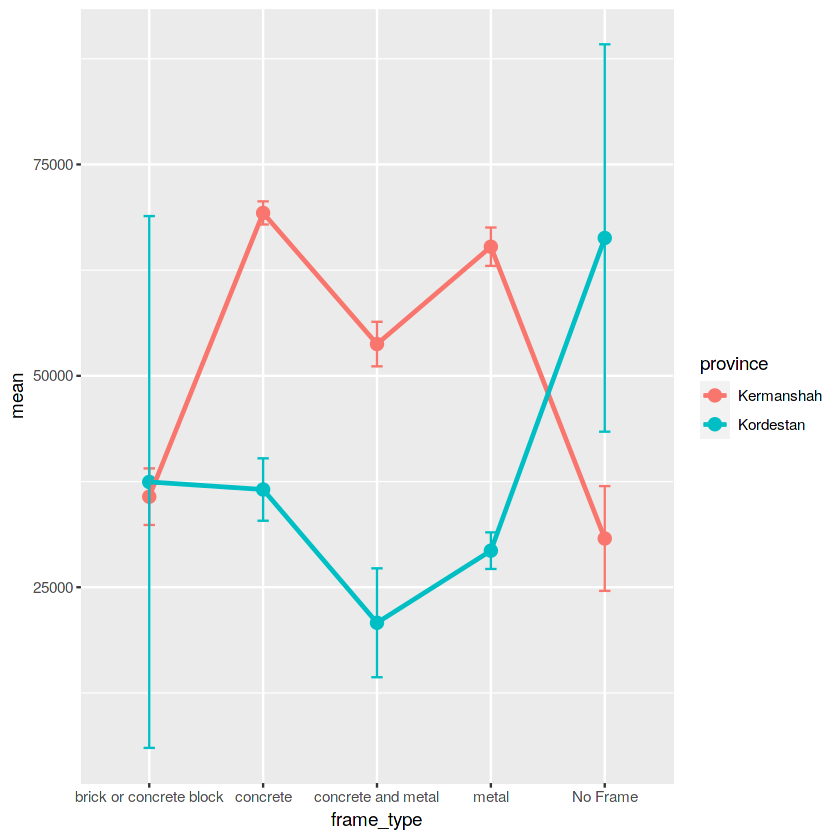

In [ ]:
plotdata <- data3 %>% 
  group_by(frame_type, province) %>% 
  summarize(n = n(),
            mean = mean(unit_price), 
            sd = sd(unit_price),
            se = sd/sqrt(n))

ggplot(plotdata, aes(x = frame_type, y = mean,
                     group=province,
                     color=province)) + 
  geom_point(size = 3) +
  geom_line(size = 1) + 
  geom_errorbar(aes(ymin =mean - se,
                    ymax = mean+se), 
                width = .1)

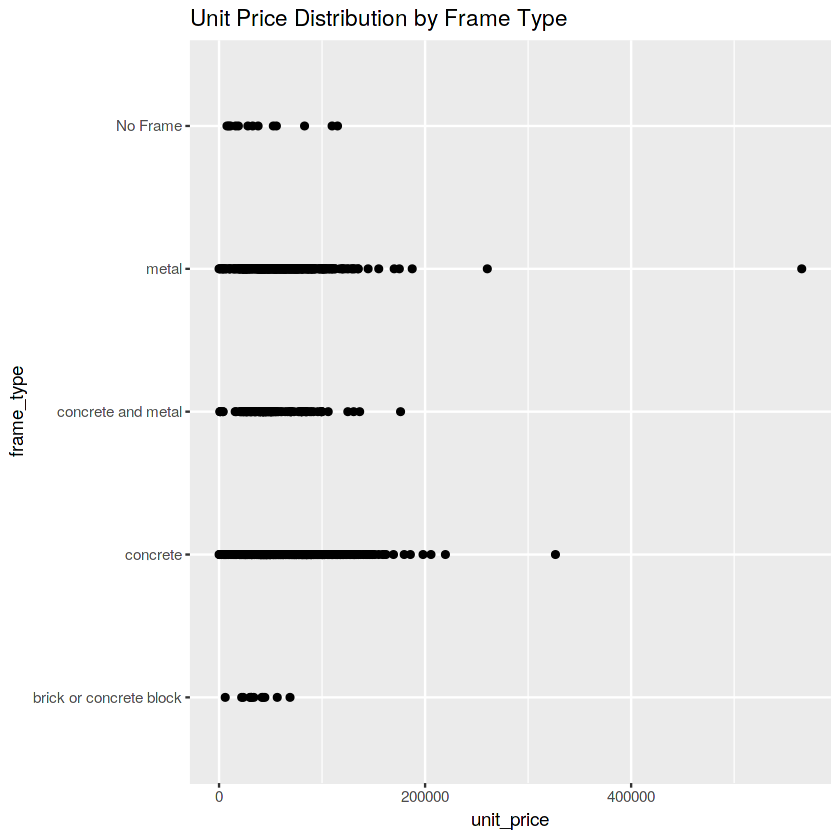

In [ ]:
ggplot(data3,
       aes(y = frame_type,
           x = unit_price)) +
  geom_point() +
  labs(title = "Unit Price Distribution by Frame Type")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



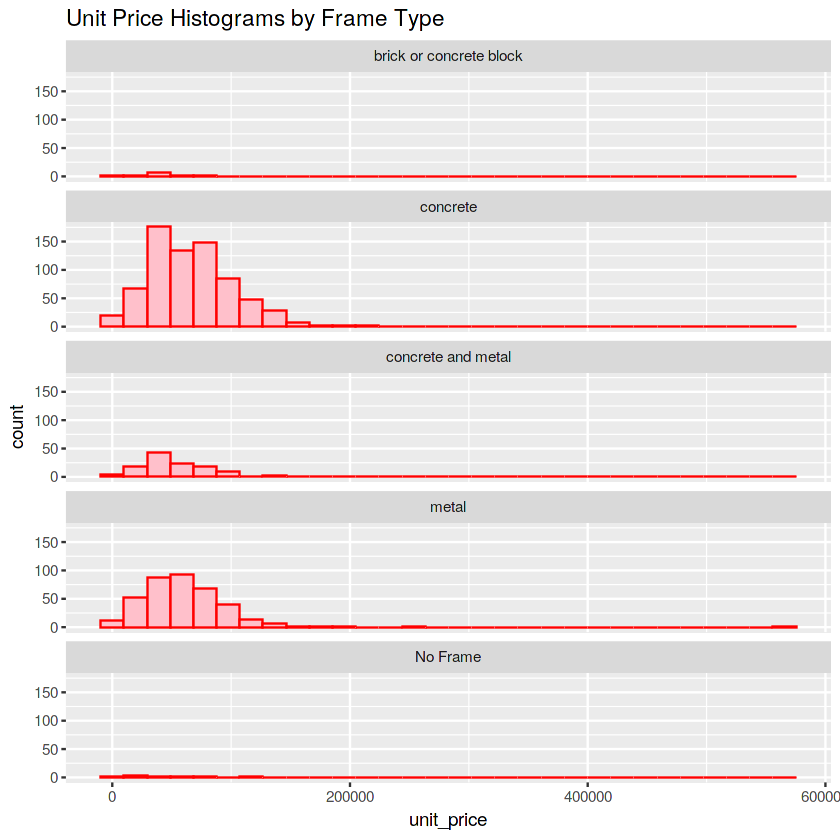

In [ ]:
ggplot(data3, aes(x = unit_price)) + 
  geom_histogram(fill = "pink",
                color = "red") + 
  facet_wrap(~frame_type, ncol = 1) +
  labs(title = "Unit Price Histograms by Frame Type")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



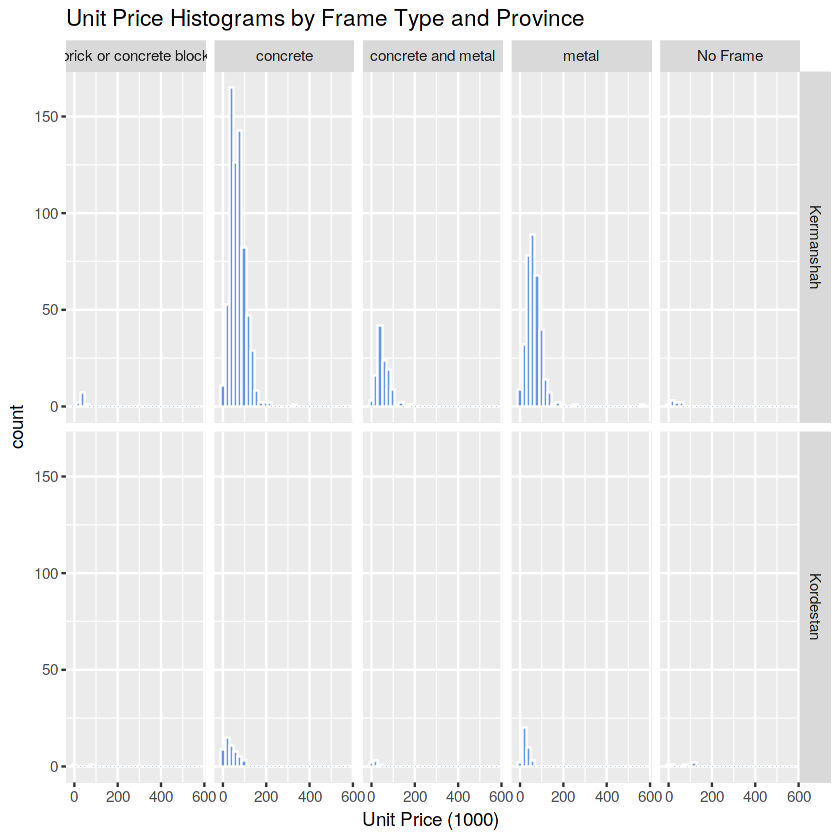

In [ ]:
ggplot(data3, aes(x = unit_price / 1000)) + 
  geom_histogram(color = "white",
                fill = "cornflowerblue") + 
  facet_grid(province ~ frame_type) +
  labs(title = "Unit Price Histograms by Frame Type and Province", 
       x = "Unit Price (1000) ")

# Statistical Model

In [ ]:
data3$region=as.character(data3$region)

In [ ]:
unique(data3$region)

[1] "5"  "3"  NA   "1"  "6"  "4"  "2"  "7"  "8"  "14" "22"

In [ ]:
colnames(data3)

[1] "contract_id"   "province"      "city"          "region"       
 [5] "area"          "percentage"    "price"         "unit_price"   
 [9] "age"           "frame_type"    "contract_date" "postal_code"

Warning message in data(data3, package = "mosaicData"):
“data set ‘data3’ not found”


area price unit_price age
area        1    1     0         -0 
price       1    1     1         -0 
unit_price  0    1     1         -0 
age        -0   -0    -0          1

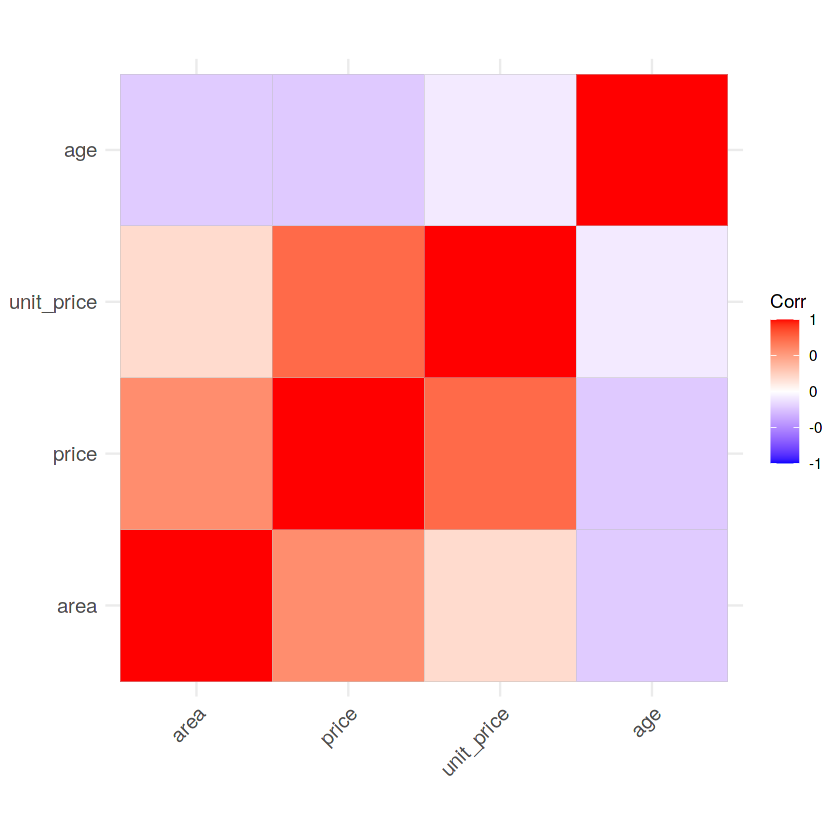

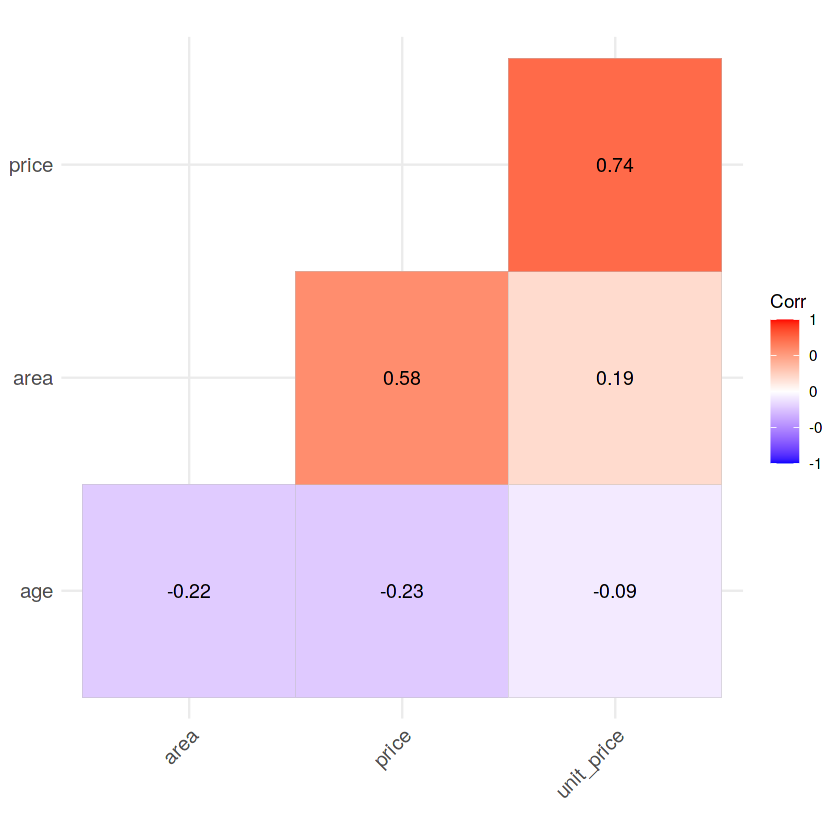

In [ ]:
data(data3, package="mosaicData")
df <- dplyr::select_if(data3, is.numeric)
r <- cor(df, use="complete.obs") 
round(r,2)
library(ggplot2) 
library(ggcorrplot) 
ggcorrplot(r)
ggcorrplot(r,
           hc.order = TRUE,
           type = "lower", lab = TRUE)

# Regression

In [ ]:
selected_var=c(3,5,8,9,10)

In [ ]:
dim(data3)

[1] 1248   12

In [ ]:
#set.seed(1)
train.index <- sample(c(1:1248), 748)

In [ ]:
train_df <- data3[train.index, selected_var] 
valid_df <- data3[-train.index, selected_var]

In [ ]:
lm1 <- lm(unit_price ~ ., data = train_df)

In [ ]:
summary(lm1)


Call:
lm(formula = unit_price ~ ., data = train_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-123716  -21486   -4223   15797  505692 

Coefficients:
                               Estimate Std. Error t value       Pr(>|t|)    
(Intercept)                     29566.4    16378.6    1.81        0.07145 .  
cityOther Cities of Kermanshah -26522.7     7008.2   -3.78        0.00017 ***
cityOther Cities of Kordestan  -41833.0     6104.4   -6.85 0.000000000015 ***
citySanandaj                    -3694.3    10173.1   -0.36        0.71660    
area                               90.2       28.3    3.18        0.00151 ** 
age                              -123.7      224.0   -0.55        0.58090    
frame_typeconcrete              32256.7    15902.8    2.03        0.04288 *  
frame_typeconcrete and metal    20448.7    16293.5    1.26        0.20987    
frame_typemetal                 30689.9    15878.5    1.93        0.05364 .  
frame_typeNo Frame                708.7    21715.5    0.03

In [ ]:
library(forecast)

lm1.pred <- predict(lm1, valid_df)

In [ ]:
some.residuals <- valid_df$unit_price[1:20] - lm1.pred[1:20]

In [ ]:
data.frame("Predicted" = lm1.pred[1:20], "Actual" = valid_df$unit_price[1:20],
"Residual" = some.residuals)

Predicted Actual Residual
108  63899     104000  40101  
190  32707      38160   5453  
202  71856      31231 -40625  
254  57736      20414 -37322  
315  42727      52887  10160  
474  68542     110000  41458  
554  67348      47452 -19896  
573  67913      97500  29587  
681  27621      42904  15284  
682  67597      40867 -26730  
766  74448     127500  53052  
789  73288      44000 -29288  
860  52185      35922 -16262  
938  67597      40000 -27597  
1220 67020      44800 -22220  
1236 71667      74825   3158  
1251 68341      48052 -20290  
1275 70753      90000  19247  
1299 73691      77640   3949  
1510 10245      52672  42427

In [ ]:
accuracy(lm1.pred, valid_df$unit_price)

ME    RMSE  MAE   MPE MAPE
Test set -2079 29798 23071 -72 93

[1] 1

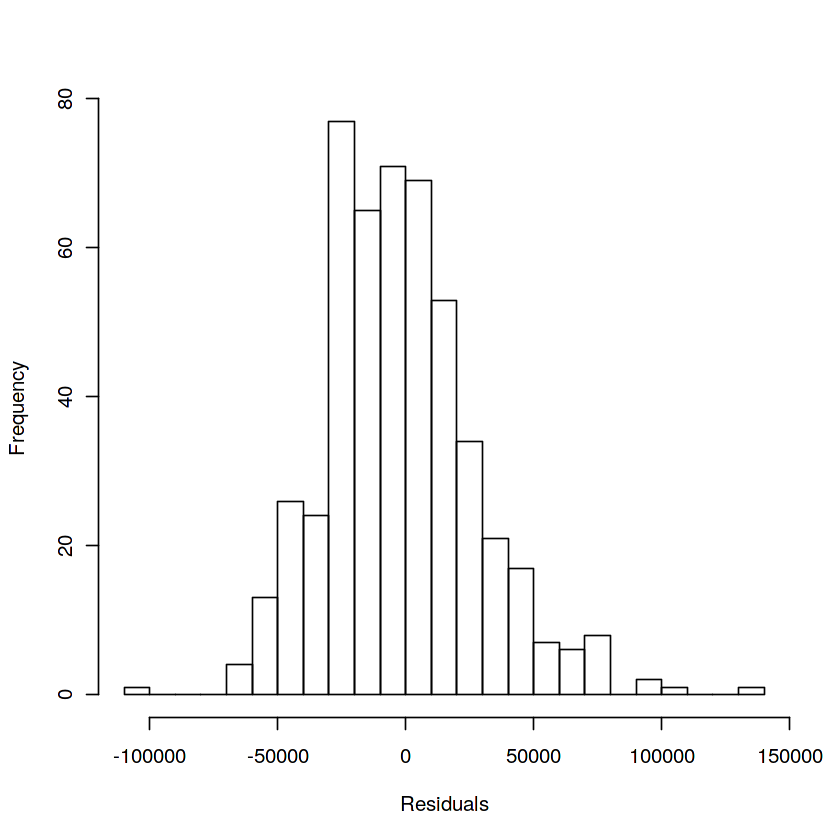

In [ ]:
options(scipen=999, digits = 0)
library(forecast)
lm1.pred <- predict(lm1, valid_df)
all.residuals <- valid_df$unit_price - lm1.pred 
length(all.residuals[which(all.residuals > -31780 & all.residuals < 31780)])/500 
hist(all.residuals, breaks = 25, xlab = "Residuals", main = "")

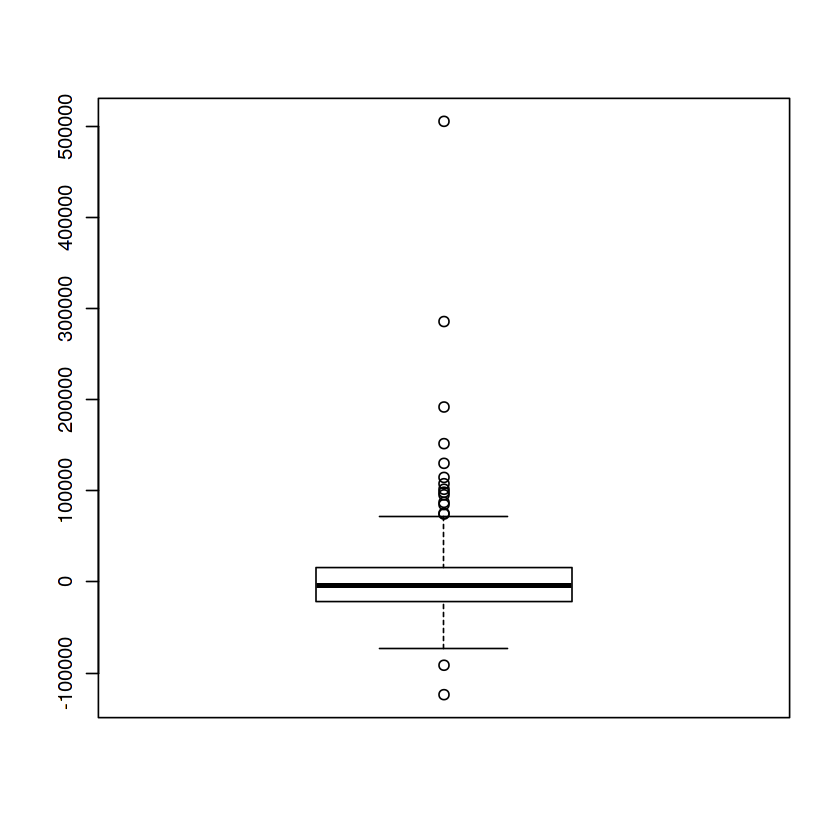

In [ ]:
boxplot(resid(lm1))

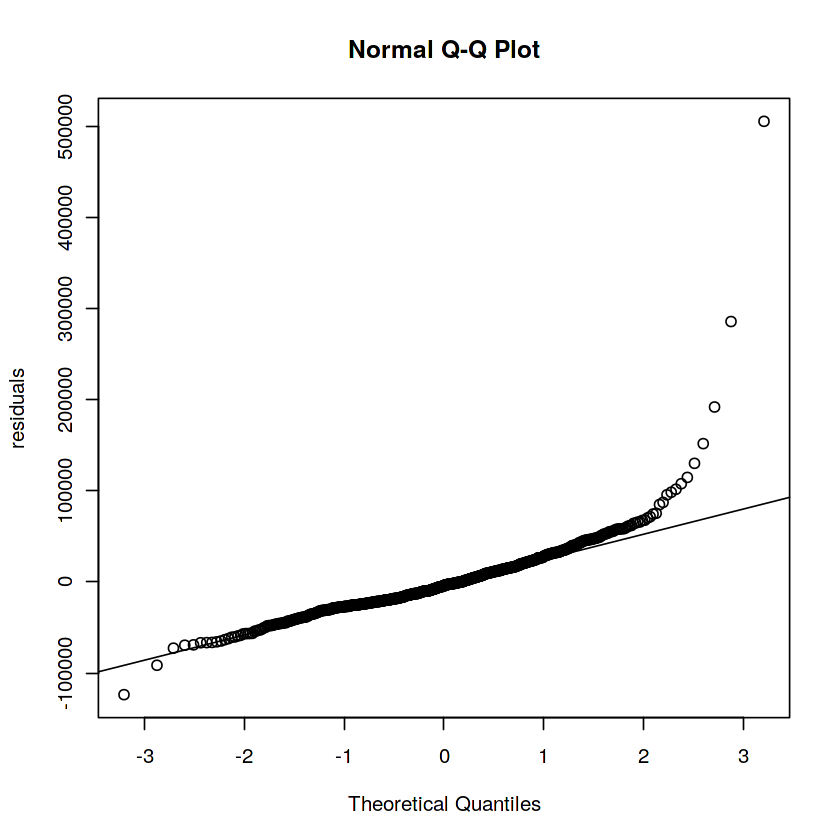

In [ ]:
qqnorm(resid(lm1),ylab="residuals")
qqline(resid(lm1))

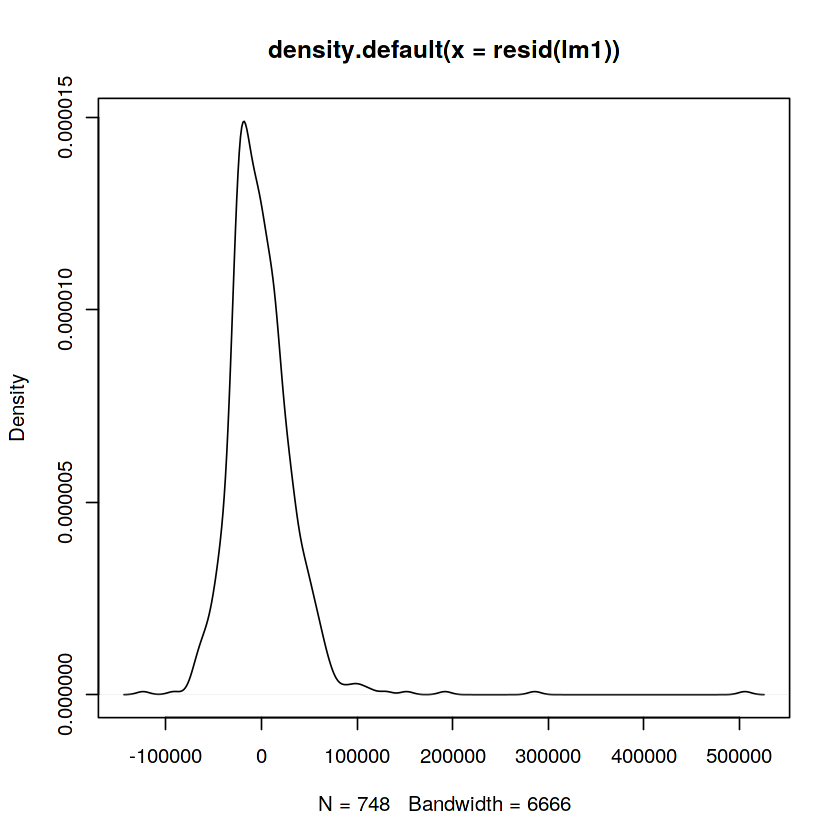

In [ ]:
plot(density(resid(lm1)))

# Decision Tree


In [ ]:
library(rpart.plot)
library(rattle)
library(RColorBrewer)
library(MASS)
library(rpart)
tree <- rpart(unit_price ~ ., data = train_df, method = "anova")

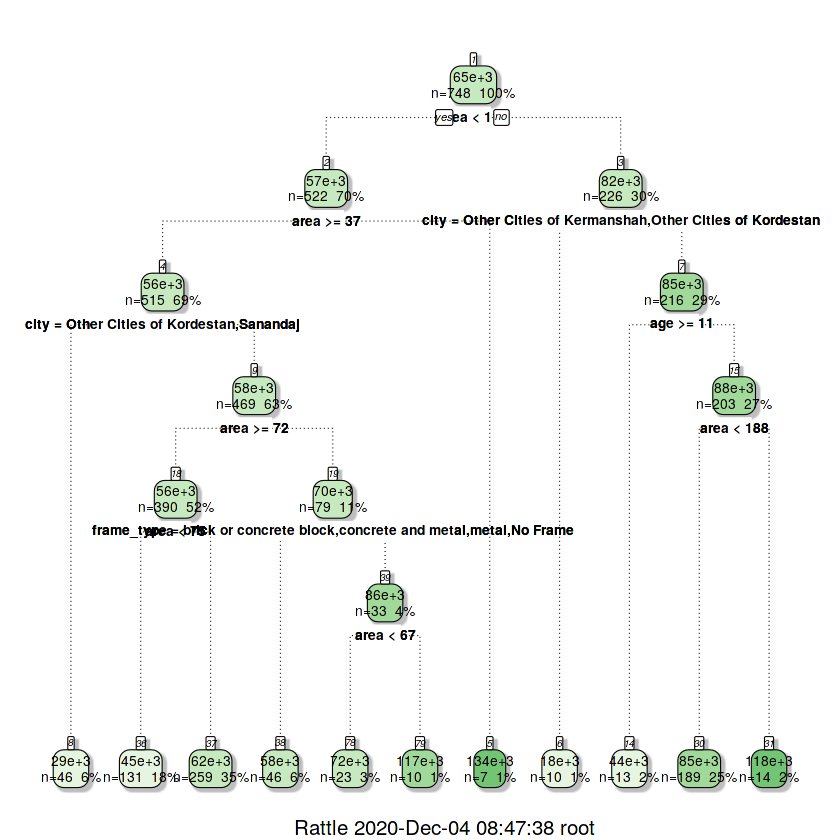

In [ ]:
fancyRpartPlot(tree)

In [ ]:
p <- function(x, type = 4, extra = 100, under = TRUE, branch.lty = 3, ...) {
prp(x = x, type = type, extra = extra, under = under, branch.lty = branch.lty, ...) }

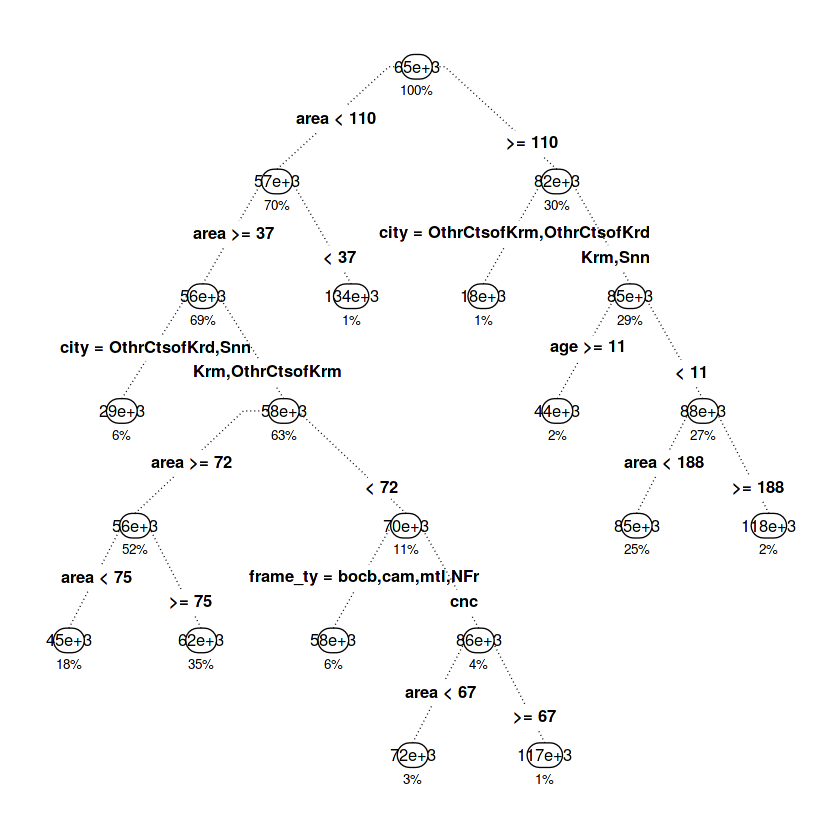

In [ ]:
p(tree)

# KNN

In [ ]:
library(caret)
library(class)
library(dplyr)
library(e1071)
library(FNN) 
library(gmodels) 
library(psych)

In [ ]:
data4=data3[selected_var]

In [ ]:
frame_type <- as.data.frame(dummy.code(data4$frame_type))
city <- as.data.frame(dummy.code(data4$city))
data4

city                       area unit_price age frame_type        
55    Kermanshah                  78   90183      7  concrete          
85    Kermanshah                  95   42421     10  concrete and metal
108   Kermanshah                  50  104000      7  metal             
135   Kermanshah                 180   90020      4  concrete          
190   Other Cities of Kermanshah 131   38160     21  concrete and metal
202   Kermanshah                 130   31231      1  metal             
246   Kermanshah                  75   48800      8  concrete and metal
254   Kermanshah                  98   20414      9  concrete and metal
287   Kermanshah                 160   18750      4  No Frame          
315   Other Cities of Kermanshah 113   52887     10  metal             
342   Kermanshah                 100  116673      2  concrete          
382   Kermanshah                  73   49315      4  concrete          
386   Kermanshah                  75   40000      9  concrete          
420   Kermanshah                  75   26667      5  concrete          
474   Kermanshah                  80  110000      4  concrete          
519   Other Cities of Kordestan   75   20000      7  concrete          
546   Kermanshah                 165   64000      0  concrete          
554   Kermanshah                  94   47452     24  concrete          
573   Kermanshah                 100   97500     11  metal             
635   Kermanshah                  65   44154     19  metal             
681   Other Cities of Kordestan  121   42904     14  metal             
682   Kermanshah                  75   40867      8  concrete          
745   Kermanshah                 159  121928      9  metal             
766   Kermanshah                 140  127500      0  concrete          
789   Kermanshah                 150   44000      4  metal             
795   Kermanshah                  88   54422     14  concrete          
797   Kermanshah                 157  120704      9  concrete          
846   Kermanshah                 102   84787      8  concrete          
860   Kermanshah                  52   35922     20  concrete and metal
890   Kermanshah                 113   80088      5  concrete and metal
⋮     ⋮                          ⋮    ⋮          ⋮   ⋮                 
35175 Kermanshah                  75   50267      9  concrete          
35208 Kermanshah                  83   72651      5  metal             
35221 Kermanshah                  98   56020      0  concrete          
35344 Kermanshah                  73   62122      9  concrete          
35369 Kermanshah                 106   66792      4  concrete          
35441 Kermanshah                 121   90083      5  concrete          
35483 Kermanshah                 100   32000      4  concrete          
35486 Kermanshah                 150   88633      4  concrete          
35512 Kermanshah                  88   83381     16  metal             
35526 Kermanshah                  75   49333      9  concrete          
35576 Kermanshah                 121   89256      2  concrete          
35623 Kermanshah                 175   85000      1  concrete          
35776 Kermanshah                  74   83311     15  metal             
35786 Kermanshah                  72   78289     14  concrete          
35788 Kermanshah                  96   25312      0  concrete          
35805 Kermanshah                 125  102000      3  concrete          
35818 Kermanshah                  90   66667      2  metal             
35856 Kermanshah                  80  100000      0  metal             
35857 Kermanshah                  75  115000     11  concrete          
35983 Kermanshah                 175  148571      0  concrete          
35991 Kermanshah                  78   43500      1  concrete          
36027 Kermanshah                 102  101228     14  concrete          
36059 Kermanshah                  80   47500      4  concrete          
36061 Kermanshah                 160   55000  

In [ ]:
data5=cbind(data4,frame_type,city)

In [ ]:
data5

city                       area unit_price age frame_type        
55    Kermanshah                  78   90183      7  concrete          
85    Kermanshah                  95   42421     10  concrete and metal
108   Kermanshah                  50  104000      7  metal             
135   Kermanshah                 180   90020      4  concrete          
190   Other Cities of Kermanshah 131   38160     21  concrete and metal
202   Kermanshah                 130   31231      1  metal             
246   Kermanshah                  75   48800      8  concrete and metal
254   Kermanshah                  98   20414      9  concrete and metal
287   Kermanshah                 160   18750      4  No Frame          
315   Other Cities of Kermanshah 113   52887     10  metal             
342   Kermanshah                 100  116673      2  concrete          
382   Kermanshah                  73   49315      4  concrete          
386   Kermanshah                  75   40000      9  concrete          
420   Kermanshah                  75   26667      5  concrete          
474   Kermanshah                  80  110000      4  concrete          
519   Other Cities of Kordestan   75   20000      7  concrete          
546   Kermanshah                 165   64000      0  concrete          
554   Kermanshah                  94   47452     24  concrete          
573   Kermanshah                 100   97500     11  metal             
635   Kermanshah                  65   44154     19  metal             
681   Other Cities of Kordestan  121   42904     14  metal             
682   Kermanshah                  75   40867      8  concrete          
745   Kermanshah                 159  121928      9  metal             
766   Kermanshah                 140  127500      0  concrete          
789   Kermanshah                 150   44000      4  metal             
795   Kermanshah                  88   54422     14  concrete          
797   Kermanshah                 157  120704      9  concrete          
846   Kermanshah                 102   84787      8  concrete          
860   Kermanshah                  52   35922     20  concrete and metal
890   Kermanshah                 113   80088      5  concrete and metal
⋮     ⋮                          ⋮    ⋮          ⋮   ⋮                 
35175 Kermanshah                  75   50267      9  concrete          
35208 Kermanshah                  83   72651      5  metal             
35221 Kermanshah                  98   56020      0  concrete          
35344 Kermanshah                  73   62122      9  concrete          
35369 Kermanshah                 106   66792      4  concrete          
35441 Kermanshah                 121   90083      5  concrete          
35483 Kermanshah                 100   32000      4  concrete          
35486 Kermanshah                 150   88633      4  concrete          
35512 Kermanshah                  88   83381     16  metal             
35526 Kermanshah                  75   49333      9  concrete          
35576 Kermanshah                 121   89256      2  concrete          
35623 Kermanshah                 175   85000      1  concrete          
35776 Kermanshah                  74   83311     15  metal             
35786 Kermanshah                  72   78289     14  concrete          
35788 Kermanshah                  96   25312      0  concrete          
35805 Kermanshah                 125  102000      3  concrete          
35818 Kermanshah                  90   66667      2  metal             
35856 Kermanshah                  80  100000      0  metal             
35857 Kermanshah                  75  115000     11  concrete          
35983 Kermanshah                 175  148571      0  concrete          
35991 Kermanshah                  78   43500      1  concrete          
36027 Kermanshah                 102  101228     14  concrete          
36059 Kermanshah                  80   47500      4  concrete          
36061 Kermanshah                 160   55000  

In [ ]:
data5 <- data5 %>% select(-one_of(c("frame_type", "city")))

In [ ]:
data5

area unit_price age concrete metal concrete and metal No Frame
55     78   90183      7  1        0     0                  0       
85     95   42421     10  0        0     1                  0       
108    50  104000      7  0        1     0                  0       
135   180   90020      4  1        0     0                  0       
190   131   38160     21  0        0     1                  0       
202   130   31231      1  0        1     0                  0       
246    75   48800      8  0        0     1                  0       
254    98   20414      9  0        0     1                  0       
287   160   18750      4  0        0     0                  1       
315   113   52887     10  0        1     0                  0       
342   100  116673      2  1        0     0                  0       
382    73   49315      4  1        0     0                  0       
386    75   40000      9  1        0     0                  0       
420    75   26667      5  1        0     0                  0       
474    80  110000      4  1        0     0                  0       
519    75   20000      7  1        0     0                  0       
546   165   64000      0  1        0     0                  0       
554    94   47452     24  1        0     0                  0       
573   100   97500     11  0        1     0                  0       
635    65   44154     19  0        1     0                  0       
681   121   42904     14  0        1     0                  0       
682    75   40867      8  1        0     0                  0       
745   159  121928      9  0        1     0                  0       
766   140  127500      0  1        0     0                  0       
789   150   44000      4  0        1     0                  0       
795    88   54422     14  1        0     0                  0       
797   157  120704      9  1        0     0                  0       
846   102   84787      8  1        0     0                  0       
860    52   35922     20  0        0     1                  0       
890   113   80088      5  0        0     1                  0       
⋮     ⋮    ⋮          ⋮   ⋮        ⋮     ⋮                  ⋮       
35175  75   50267      9  1        0     0                  0       
35208  83   72651      5  0        1     0                  0       
35221  98   56020      0  1        0     0                  0       
35344  73   62122      9  1        0     0                  0       
35369 106   66792      4  1        0     0                  0       
35441 121   90083      5  1        0     0                  0       
35483 100   32000      4  1        0     0                  0       
35486 150   88633      4  1        0     0                  0       
35512  88   83381     16  0        1     0                  0       
35526  75   49333      9  1        0     0                  0       
35576 121   89256      2  1        0     0                  0       
35623 175   85000      1  1        0     0                  0       
35776  74   83311     15  0        1     0                  0       
35786  72   78289     14  1        0     0                  0       
35788  96   25312      0  1        0     0                  0       
35805 125  102000      3  1        0     0                  0       
35818  90   66667      2  0        1     0                  0       
35856  80  100000      0  0        1     0                  0       
35857  75  115000     11  1        0     0                  0       
35983 175  148571      0  1        0     0                  0       
35991  78   43500      1  1        0     0                  0       
36027 102  101228     14  1        0     0                  0       
36059  80   47500      4  1        0     0                  0       
36061 160   55000      0  0        1     0                  0       
36086  73   58219      3  1        0     0                  0       
36087 101  129221     10  0        1     0                  0       
3609

In [ ]:
smp_size <- floor(0.75 * nrow(data5))

In [ ]:
train_ind <- sample(seq_len(nrow(data5)), size = smp_size)

# creating test and training sets that contain all of the predictors
reg_pred_train <- data5[train_ind, ]
reg_pred_test <- data5[-train_ind, ]

In [ ]:
unit_price_outcome <- data5 %>% select(unit_price)

In [ ]:
price_outcome_train <- unit_price_outcome[train_ind, ]
price_outcome_test <- unit_price_outcome[-train_ind, ]

In [ ]:
reg_results <- knn.reg(reg_pred_train, reg_pred_test, price_outcome_train, k = 30)
print(reg_results)

Prediction:
  [1]  31300  20887  19454 117133  40050  26586  40917  84928  84410  80281
 [11]  52687  73758  39621  58464  36001  24996 142193  66254  84833  46698
 [21]   4802   3935  97883  40050  59449  76970  24231  21561  43979  30471
 [31]  72301  26787  92219 137450  47999  43979  56737  44028  86115  17674
 [41]  41485  29915  40917  52319  92611  76162  40917  40050   5456 114955
 [51]  87307  92838  53934  39552  64304  22690  30200 130616  41485  80281
 [61] 115310  49324  50894  43091  48871  69843  33864  25280  68427  45469
 [71]  38827  45818  74369  64887   9762   3935  86559  27606  71683  40050
 [81]  62769  24231  85432  73200  84195  85139  54872  54872  53934  61294
 [91] 119791  12696  49883  54872  40050  52504  39418 140453  74188  84195
[101]  43091  43357  75480  99752  42941  10877  80616  82578  23505 132959
[111]  22965  23629  76378  41363  42784  64732 146424  70673  39682  89351
[121]  85811  39682  63660  55750 131335  84410 109327 109327  69210  26071


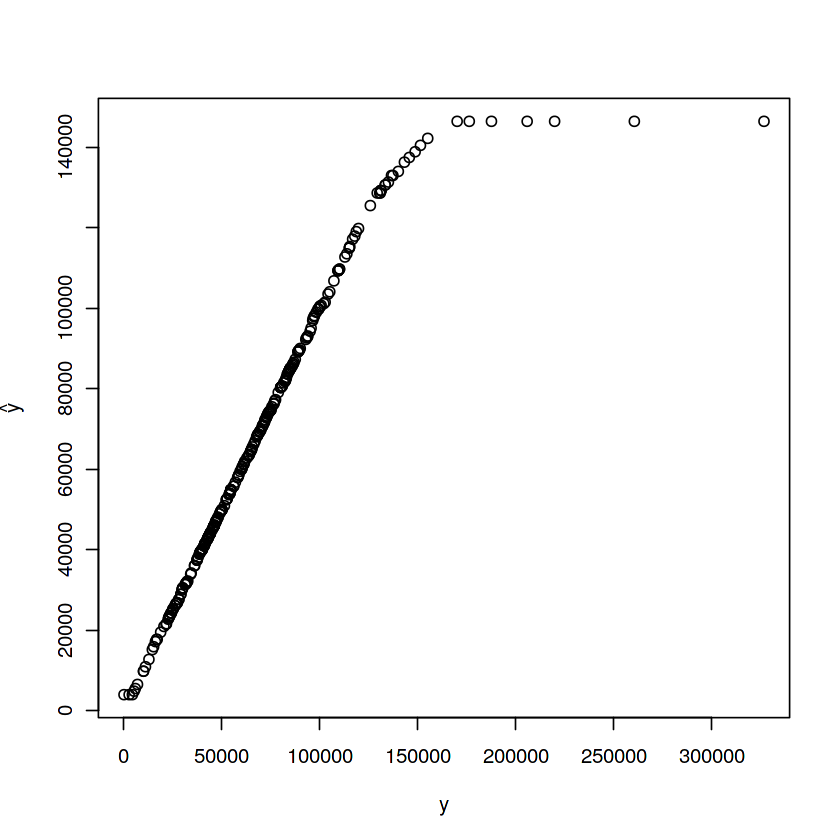

In [ ]:
plot(price_outcome_test, reg_results$pred, xlab="y", ylab=expression(hat(y)))

In [ ]:
mean((price_outcome_test - reg_results$pred) ^ 2)

[1] 186175227

In [ ]:
mean(abs(price_outcome_test - reg_results$pred))

[1] 2145